-----
# 02 - Unibiomarker Analysis

In [1]:
from pathlib import Path
import seaborn as sns
import pandas as pd

from utils import format_dataframe, add_ratio_columns
from unibiomarker import Unibiomarker
import constants

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Default Plot Style : 
sns.set(style="whitegrid")


## 1. Data Loading & Preparation

In [2]:
# Set path to Data Directory : 
DIR_DATA = Path.cwd() / "data"

# Check existence to training/test files : 
print(fr"Data Directory    : {str(DIR_DATA)}")
print(fr"Train Data exists : {(DIR_DATA / 'cercare_training_data.xlsx').exists()}")
print(fr"Test Data exists  : {(DIR_DATA / 'cercare_test_data.xlsx').exists()}")


Data Directory    : C:\Users\maichi\work\my_projects\CercareStatAnalysis\data
Train Data exists : True
Test Data exists  : True


In [3]:
# Load Cercare Training / Test Excel spreadsheets :
df_data = pd.read_excel(DIR_DATA / "cercare_training_data.xlsx").rename(columns=constants.DICT_RENAMING_MAPPING)
df_test = pd.read_excel(DIR_DATA / "cercare_test_data.xlsx").rename(columns=constants.DICT_RENAMING_MAPPING)

# Format dataframes : 
df_data = format_dataframe(df=df_data)
df_test = format_dataframe(df=df_test)

# Add the ratio columns : 
add_ratio_columns(df_data)
add_ratio_columns(df_test)

print("Data Loaded and formatted Successfully ! ")


Data Loaded and formatted Successfully ! 


##  2. 🔧  Configuration 

In [4]:
BIOMARKER = "CBV_noncorr"  # Choose from :  ADC, CBV_corr, CBV_noncorr, DELAY, CTH, CTH MAX, OEF, rLEAKAGE, rCMRO2, COV

In [5]:
# Unibiomarker object Initialization : 
ub = Unibiomarker(name=BIOMARKER, data = df_data, test_data=df_test)
print(ub)


Biomarker object
- Parameters: CBV_noncorr_path, CBV_noncorr_control, CBV_noncorr_ratio
- Training samples: 182
- Test samples: 23



## 3. Descriptive Analysis

### 3.1 Check for missing values

Fully usable rows in train: 181/182 (99.5%)
Fully usable rows in test:  23/23 (100.0%)


,Train Missing %,Test Missing %
CBV_noncorr_path,0.5,0.0
CBV_noncorr_control,0.5,0.0
CBV_noncorr_ratio,0.5,0.0


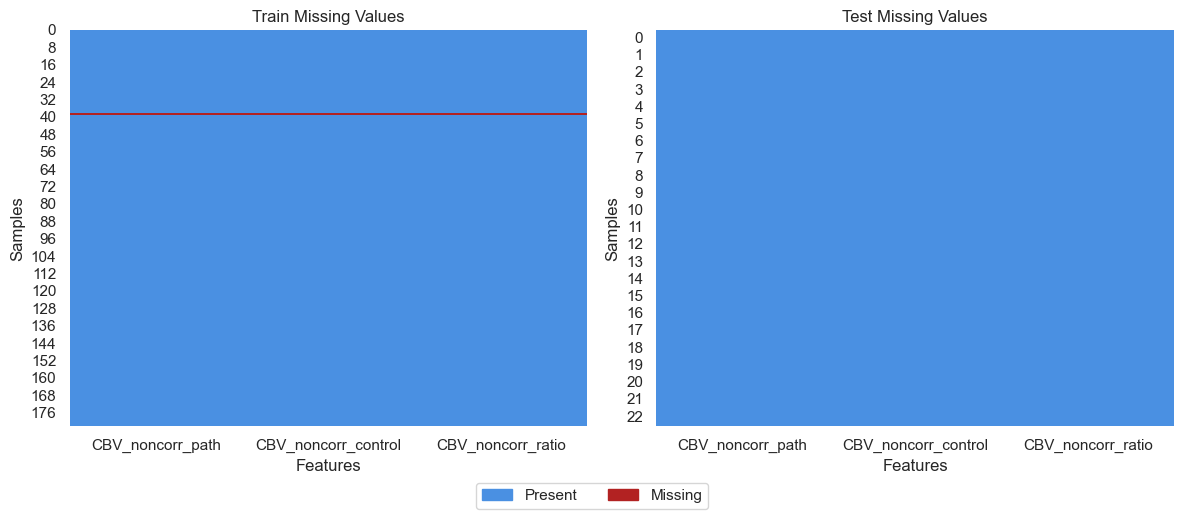

In [6]:
ub.check_missing_data()


### 3.2 Describe & Visualize key features

In [7]:
ub.describe_features(features=[ub.path, ub.control])


Overall Descriptive Statistics : 


,count,mean,std,min,25%,50%,75%,max
CBV_noncorr_path,181.0,3.538011,2.911212,0.2,1.51,2.6,4.87,19.34
CBV_noncorr_control,181.0,3.136133,1.842984,0.4,2.11,2.8,3.74,18.00



Descriptive Statistics by 'Diagnosis' Class:


,Feature,Class,count,mean,std,min,25%,50%,75%,max
0,CBV_noncorr_path,0,110.0,2.702273,2.072381,0.20,1.14,2.16,3.8375,11.00
2,CBV_noncorr_path,1,71.0,4.832817,3.508226,0.56,2.52,4.24,6.6350,19.34
1,CBV_noncorr_control,0,110.0,3.495545,2.111105,0.90,2.27,2.94,4.0200,18.00
3,CBV_noncorr_control,1,71.0,2.579296,1.129947,0.40,1.92,2.36,3.0500,7.29


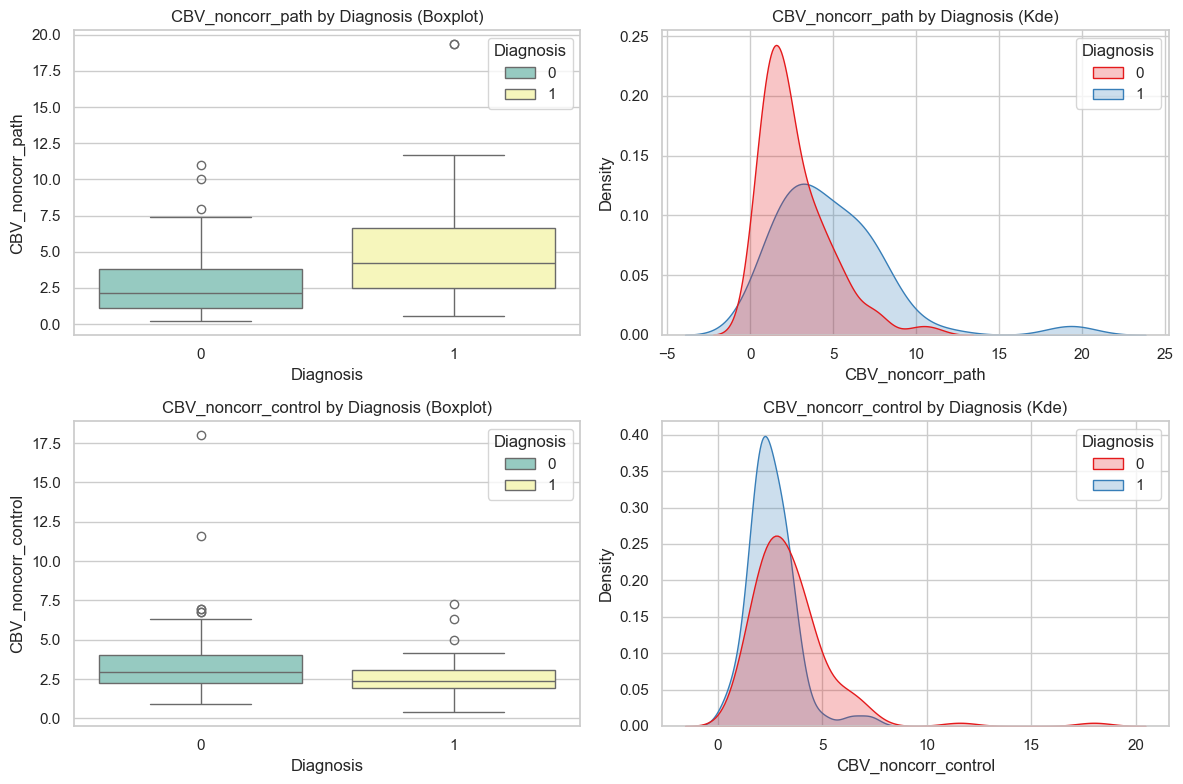

In [8]:
ub.plot_feature_distributions(features=[ub.path, ub.control], plots=["boxplot", "kde"])


### 3.3 Ratio Analysis

The goal of this section is to check correlation between the path variable and the control variable

The ratio is defined as:  
**`Ratio = Path / Control`**

To assess whether this ratio provides *new, meaningful information*, we first examine the correlation between `Path` and `Control` values:

---

#### 🔍 What we check

1. **Pearson correlation** (linear relationship)  
   Measures the strength of a **linear** association between `Path` and `Control`.

   $$
   r = \frac{\text{Cov}(X, Y)}{\sigma_X \cdot \sigma_Y}
   $$

2. **Spearman correlation** (monotonic relationship)  
   Applies the Pearson formula to the **ranked values** rather than raw values.

   $$
   \rho = \frac{\text{Cov}(\text{Rank}(X), \text{Rank}(Y))}{\sigma_{\text{Rank}(X)} \cdot \sigma_{\text{Rank}(Y)}}
   $$

   This makes Spearman suitable for detecting **monotonic relationships** that are not necessarily linear.

3. **Statistical significance** (p-values)  
   For both Pearson and Spearman, a **p-value** tests the null hypothesis that the correlation is zero (i.e., no association exists):

   - A **low p-value** (typically < 0.05) indicates that the correlation is **statistically significant**  
   - A **high p-value** means there is **insufficient evidence** to conclude that a statistically significant correlation exists
     

In [9]:
ub.describe_features(features=[ub.ratio])

Overall Descriptive Statistics : 


,count,mean,std,min,25%,50%,75%,max
CBV_noncorr_ratio,181.0,1.409516,1.477994,0.044543,0.510029,0.866667,1.811429,11.55



Descriptive Statistics by 'Diagnosis' Class:


,Feature,Class,count,mean,std,min,25%,50%,75%,max
0,CBV_noncorr_ratio,0,110.0,0.900440,0.825771,0.044543,0.404255,0.648712,1.161463,4.466667
1,CBV_noncorr_ratio,1,71.0,2.198225,1.875418,0.248571,0.927007,1.852071,2.859438,11.550000


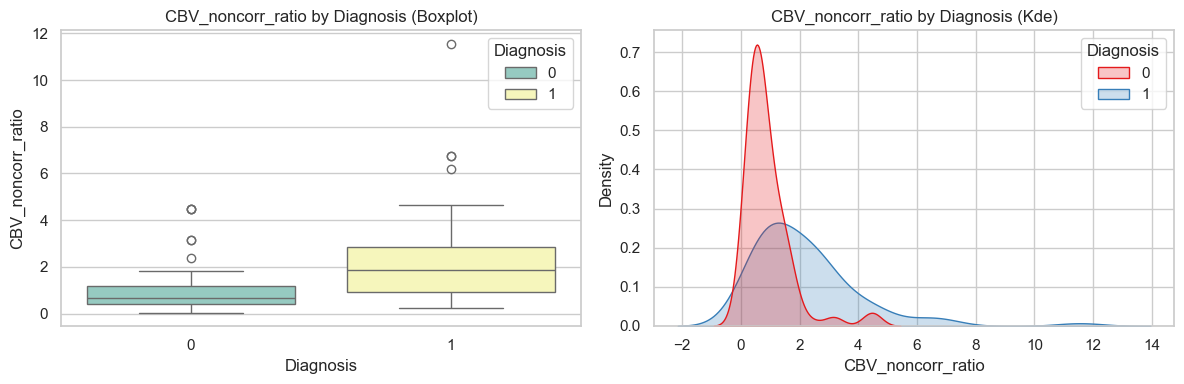

In [10]:
ub.plot_feature_distributions(features=[ub.ratio], plots=["boxplot", "kde"])

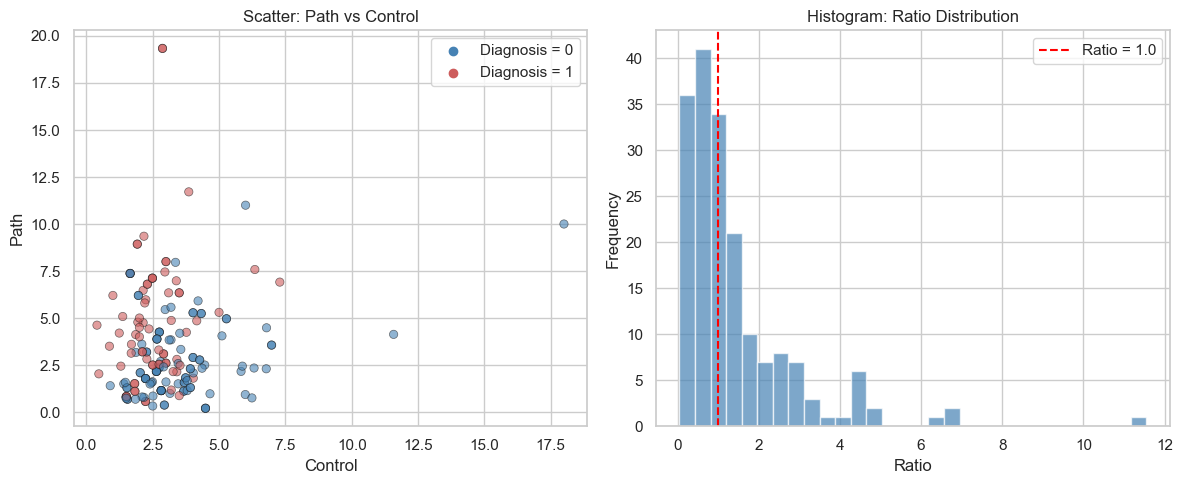

In [11]:
ub.plot_diagnostic_scatter_and_ratio()

In [12]:
ub.evaluate_path_control_correlation()

🔍 Analyzing Biomarker: CBV_noncorr
------------------------------------------------------------------------------------------------------------------------------------------------------
--- Step 1: Correlation Analysis between Path and Control 
------------------------------------------------------------------------------------------------------------------------------------------------------
- Pearson  correlation: r = 0.135, p = 0.0703
- Spearman correlation: r = 0.078, p = 0.2988

------------------------------------------------------------------------------------------------------------------------------------------------------
--- Step 2: Interpretation Guidance 
------------------------------------------------------------------------------------------------------------------------------------------------------
Neither Pearson nor Spearman correlation is statistically significant ! 
No clear association between Path and Control ! 
The ratio is a worthwhile feature to explore ! 


## 4.  Discriminative Power of the Biomarker


In this section, we assess whether features like `path` and `ratio` can **discriminate between diagnostic groups**, such as Tumor Recurrence and Radiation Necrosis.

---

#### Step 1 – Normality Check

We start with **Q–Q plots** to visually evaluate whether the distribution of the feature within each group appears **approximately normal**. This helps decide whether we can meaningfully apply a parametric test that models the **data distribution**.

---
#### Step 2 – Choosing the Right Statistical Test

- If the feature appears **normally distributed** in each group, we apply a **Welch’s t-test**.
  - This test assumes the data follows a normal distribution and compares the **means** between groups.
  - Using a parametric test like this is valuable because it lets us **model the data with a known distribution**

- If the feature **does not appear normally distributed**, we instead use the **Mann–Whitney U test**.
  - This is a **non-parametric** test that compares whether values in one group tend to be higher or lower than in the other.
  - It doesn’t assume any specific distribution and works on **ranked data** rather than actual values.
  - But it doesn’t let us **model or describe the underlying distribution** of the data 

---

#### Step 3 – Interpreting the Results

If either test reports a **statistically significant difference** (typically p < 0.05), it suggests that the feature behaves differently between groups — a necessary condition for it to be useful as a biomarker

### 4.1. Distribution Differences: Path Feature

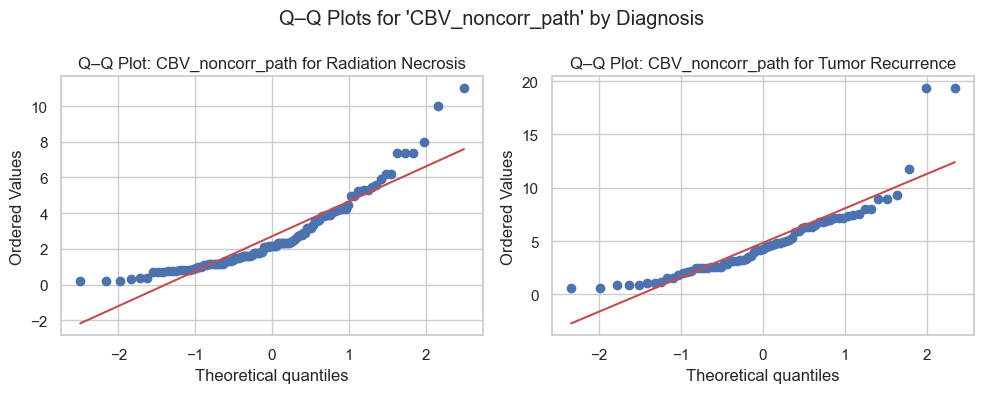

In [13]:
ub.plot_qq_by_group(feature=ub.path)

In [14]:
ub.test_group_difference(feature=ub.path)

Group Comparison Results:
----------------------------------------------------------------------------------------------------
Welch’s t-test       → statistic = -4.6230, p = 0.0000   → ✅ Significant difference
Mann–Whitney U test  → statistic = 2175.0000, p = 0.0000   → ✅ Significant difference



🔎 [ROC-Based Classification] Feature: 'CBV_noncorr_path'
--------------------------------------------------------------------------------
AUC (Train) : 0.722  (95% CI: 0.644 – 0.799)
AUC (Test)  : 0.812  (95% CI: 0.590 – 1.000)

 Optimal threshold (Youden’s J): 2.440
 Classification Rule          : Class = 1 if CBV_noncorr_path ≥ 2.440

▶ TRAIN SET METRICS AT THRESHOLD: 2.440
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      68.0
Recall (Sensitivity) |      80.3
Specificity          |      60.0
Precision            |      56.4
F1 Score             |      66.3

▶ TEST SET METRICS AT THRESHOLD: 2.440
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      39.1
Recall (Sensitivity) |     100.0
Specificity          |      12.5
Precision            |      33.3
F1 Score   

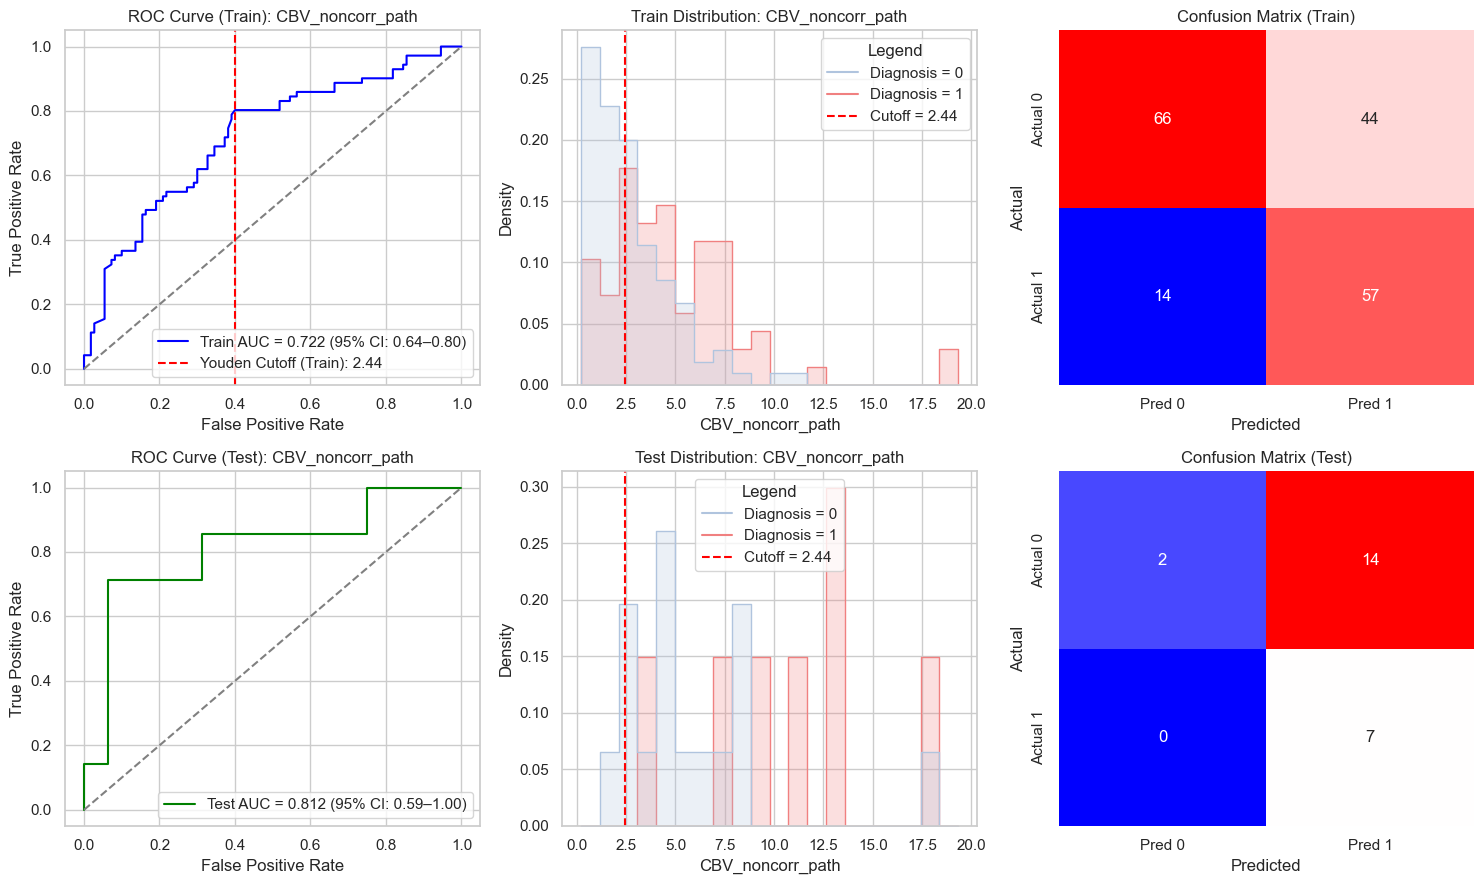

In [15]:
ub.evaluate_feature_predictive_power(feature=ub.path, target_bin_count=20)

### 4.2. Distribution Differences: Path Feature

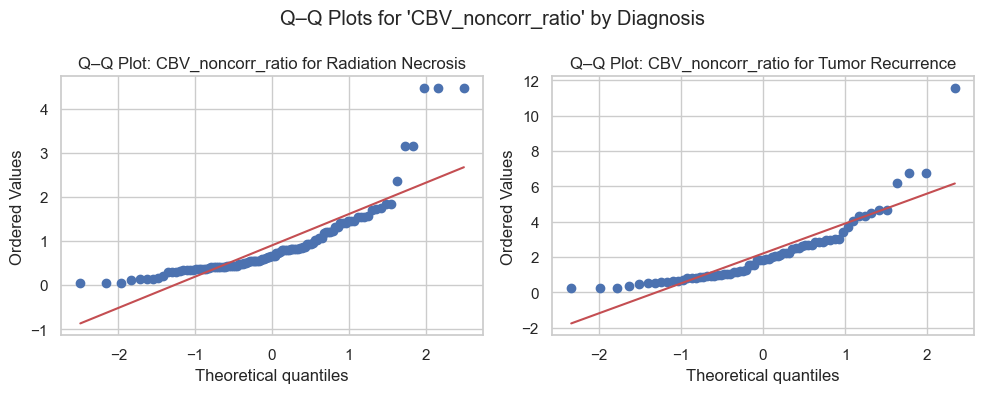

In [16]:
ub.plot_qq_by_group(feature=ub.ratio)

In [17]:
ub.test_group_difference(feature=ub.ratio)

Group Comparison Results:
----------------------------------------------------------------------------------------------------
Welch’s t-test       → statistic = -5.4971, p = 0.0000   → ✅ Significant difference
Mann–Whitney U test  → statistic = 1668.5000, p = 0.0000   → ✅ Significant difference



🔎 [ROC-Based Classification] Feature: 'CBV_noncorr_ratio'
--------------------------------------------------------------------------------
AUC (Train) : 0.786  (95% CI: 0.717 – 0.856)
AUC (Test)  : 0.768  (95% CI: 0.542 – 0.994)

 Optimal threshold (Youden’s J): 1.811
 Classification Rule          : Class = 1 if CBV_noncorr_ratio ≥ 1.811

▶ TRAIN SET METRICS AT THRESHOLD: 1.811
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      77.3
Recall (Sensitivity) |      53.5
Specificity          |      92.7
Precision            |      82.6
F1 Score             |      65.0

▶ TEST SET METRICS AT THRESHOLD: 1.811
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      69.6
Recall (Sensitivity) |      85.7
Specificity          |      62.5
Precision            |      50.0
F1 Score 

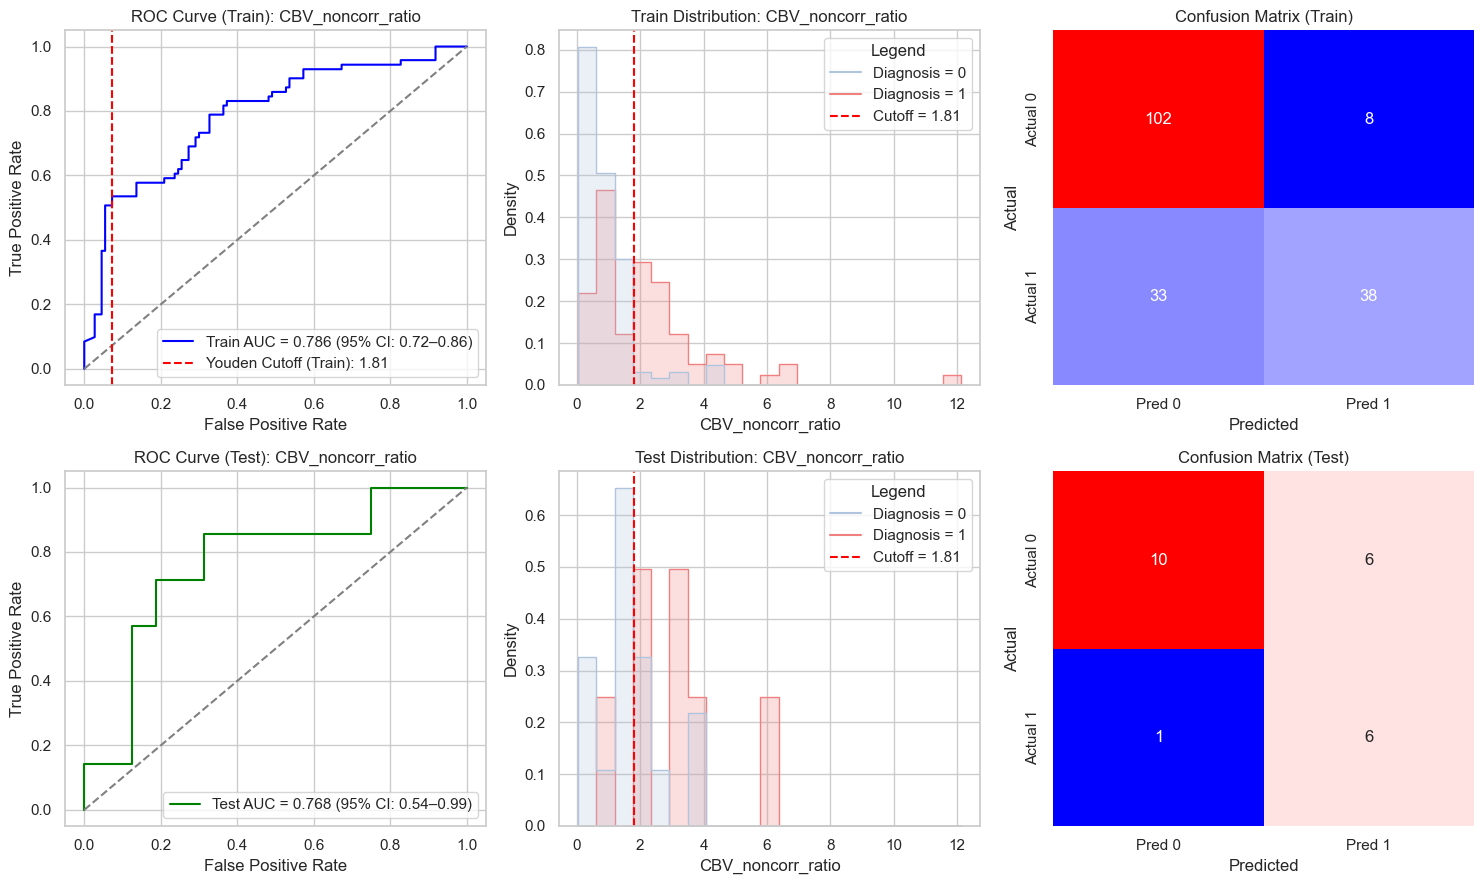

In [18]:
ub.evaluate_feature_predictive_power(feature=ub.ratio, target_bin_count=20)

## 5.  Logistic Regression Modelling

### 5.1 Univariate Logistic Regression 


Logistic Regression Summary for Feature: CBV_noncorr_path
----------------------------------------------------------------------------------------------------
Log-Odds Coefficient : 0.3223
Odds Ratio           : 1.3803
Youden's J Threshold : 0.3107
----------------------------------------------------------------------------------------------------

--- Inference Using statsmodels ---
Odds Ratio (statsmodels)  : 1.3803
95% CI for OR             : (1.1969, 1.5918)
p-value                   : 9.3602e-06
----------------------------------------------------------------------------------------------------

▶ [CBV_NONCORR_PATH] TRAIN @ 0.5
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      66.9
Recall (Sensitivity) |      39.4
Specificity          |      84.5
Precision            |      62.2
F1 Score             |      48.3

▶ [CBV_NONCORR_PATH] TRAIN @ YOUDEN
--------------------

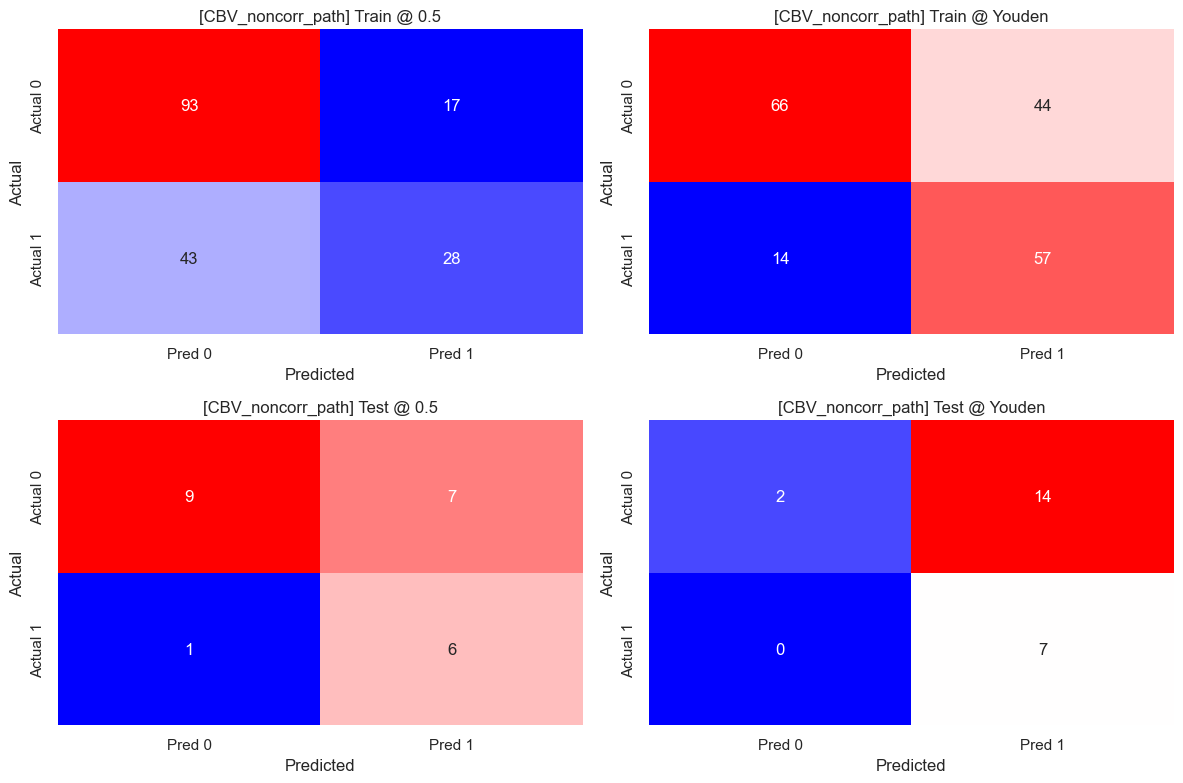

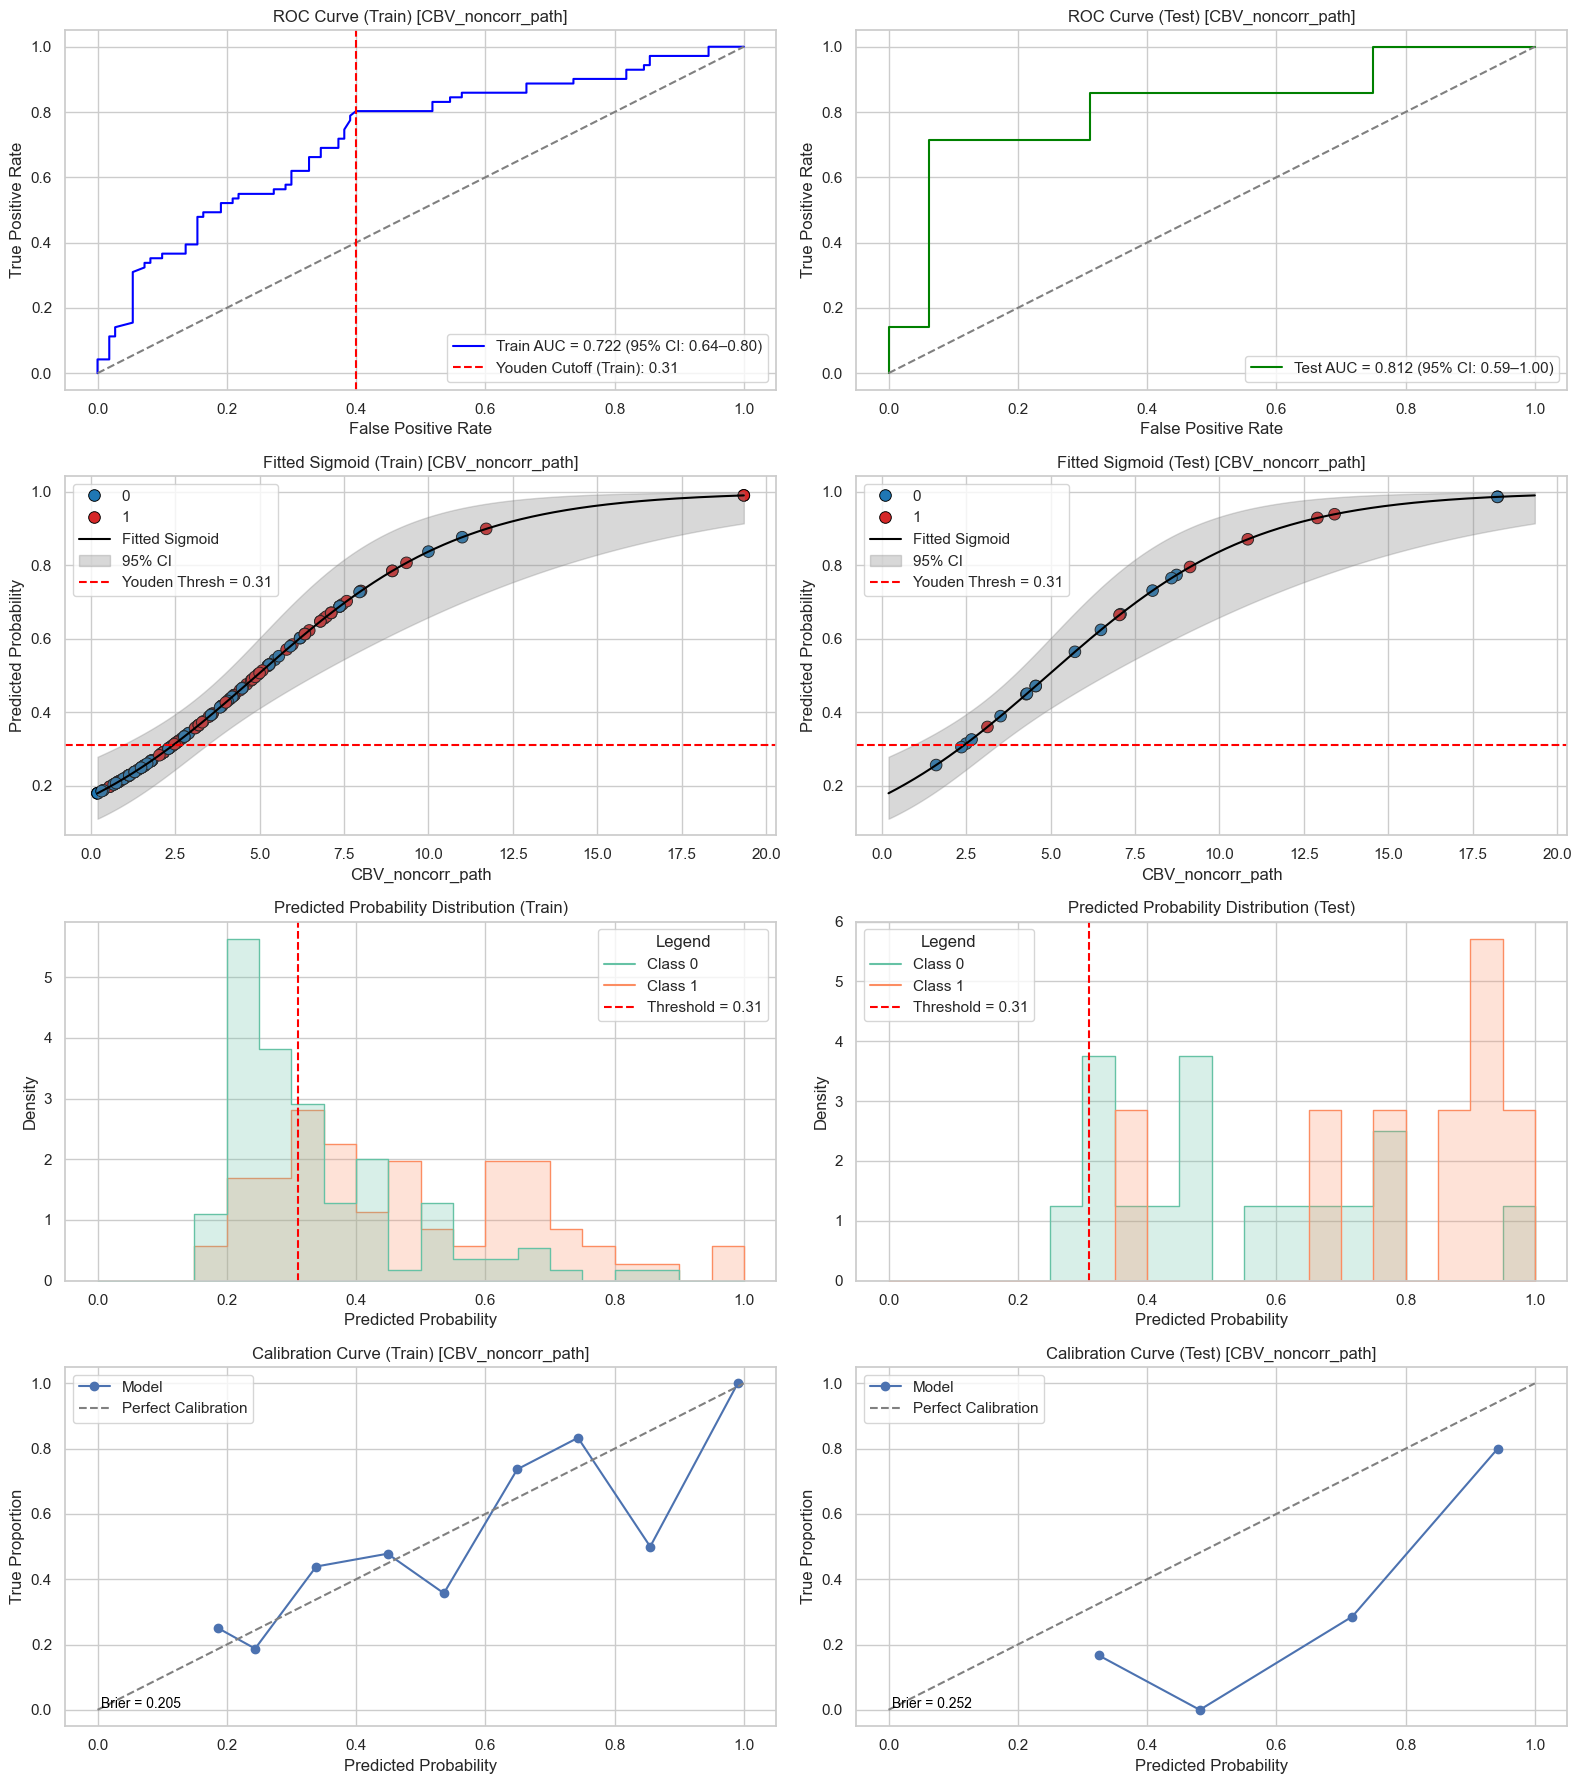

In [19]:
ub.evaluate_logistic_univariate_model(feature=ub.path, target_bin_count=20)


Logistic Regression Summary for Feature: CBV_noncorr_ratio
----------------------------------------------------------------------------------------------------
Log-Odds Coefficient : 0.9683
Odds Ratio           : 2.6334
Youden's J Threshold : 0.5046
----------------------------------------------------------------------------------------------------

--- Inference Using statsmodels ---
Odds Ratio (statsmodels)  : 2.6334
95% CI for OR             : (1.8117, 3.8277)
p-value                   : 3.8914e-07
----------------------------------------------------------------------------------------------------

▶ [CBV_NONCORR_RATIO] TRAIN @ 0.5
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      77.3
Recall (Sensitivity) |      53.5
Specificity          |      92.7
Precision            |      82.6
F1 Score             |      65.0

▶ [CBV_NONCORR_RATIO] TRAIN @ YOUDEN
-----------------

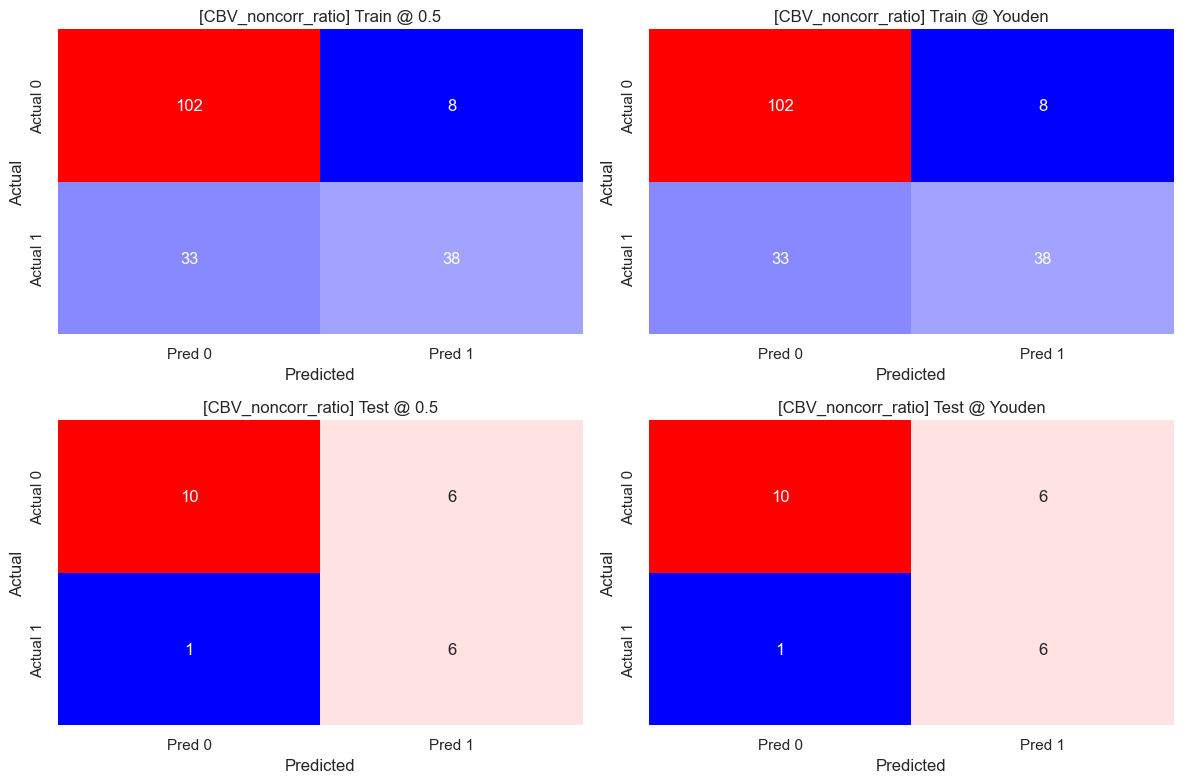

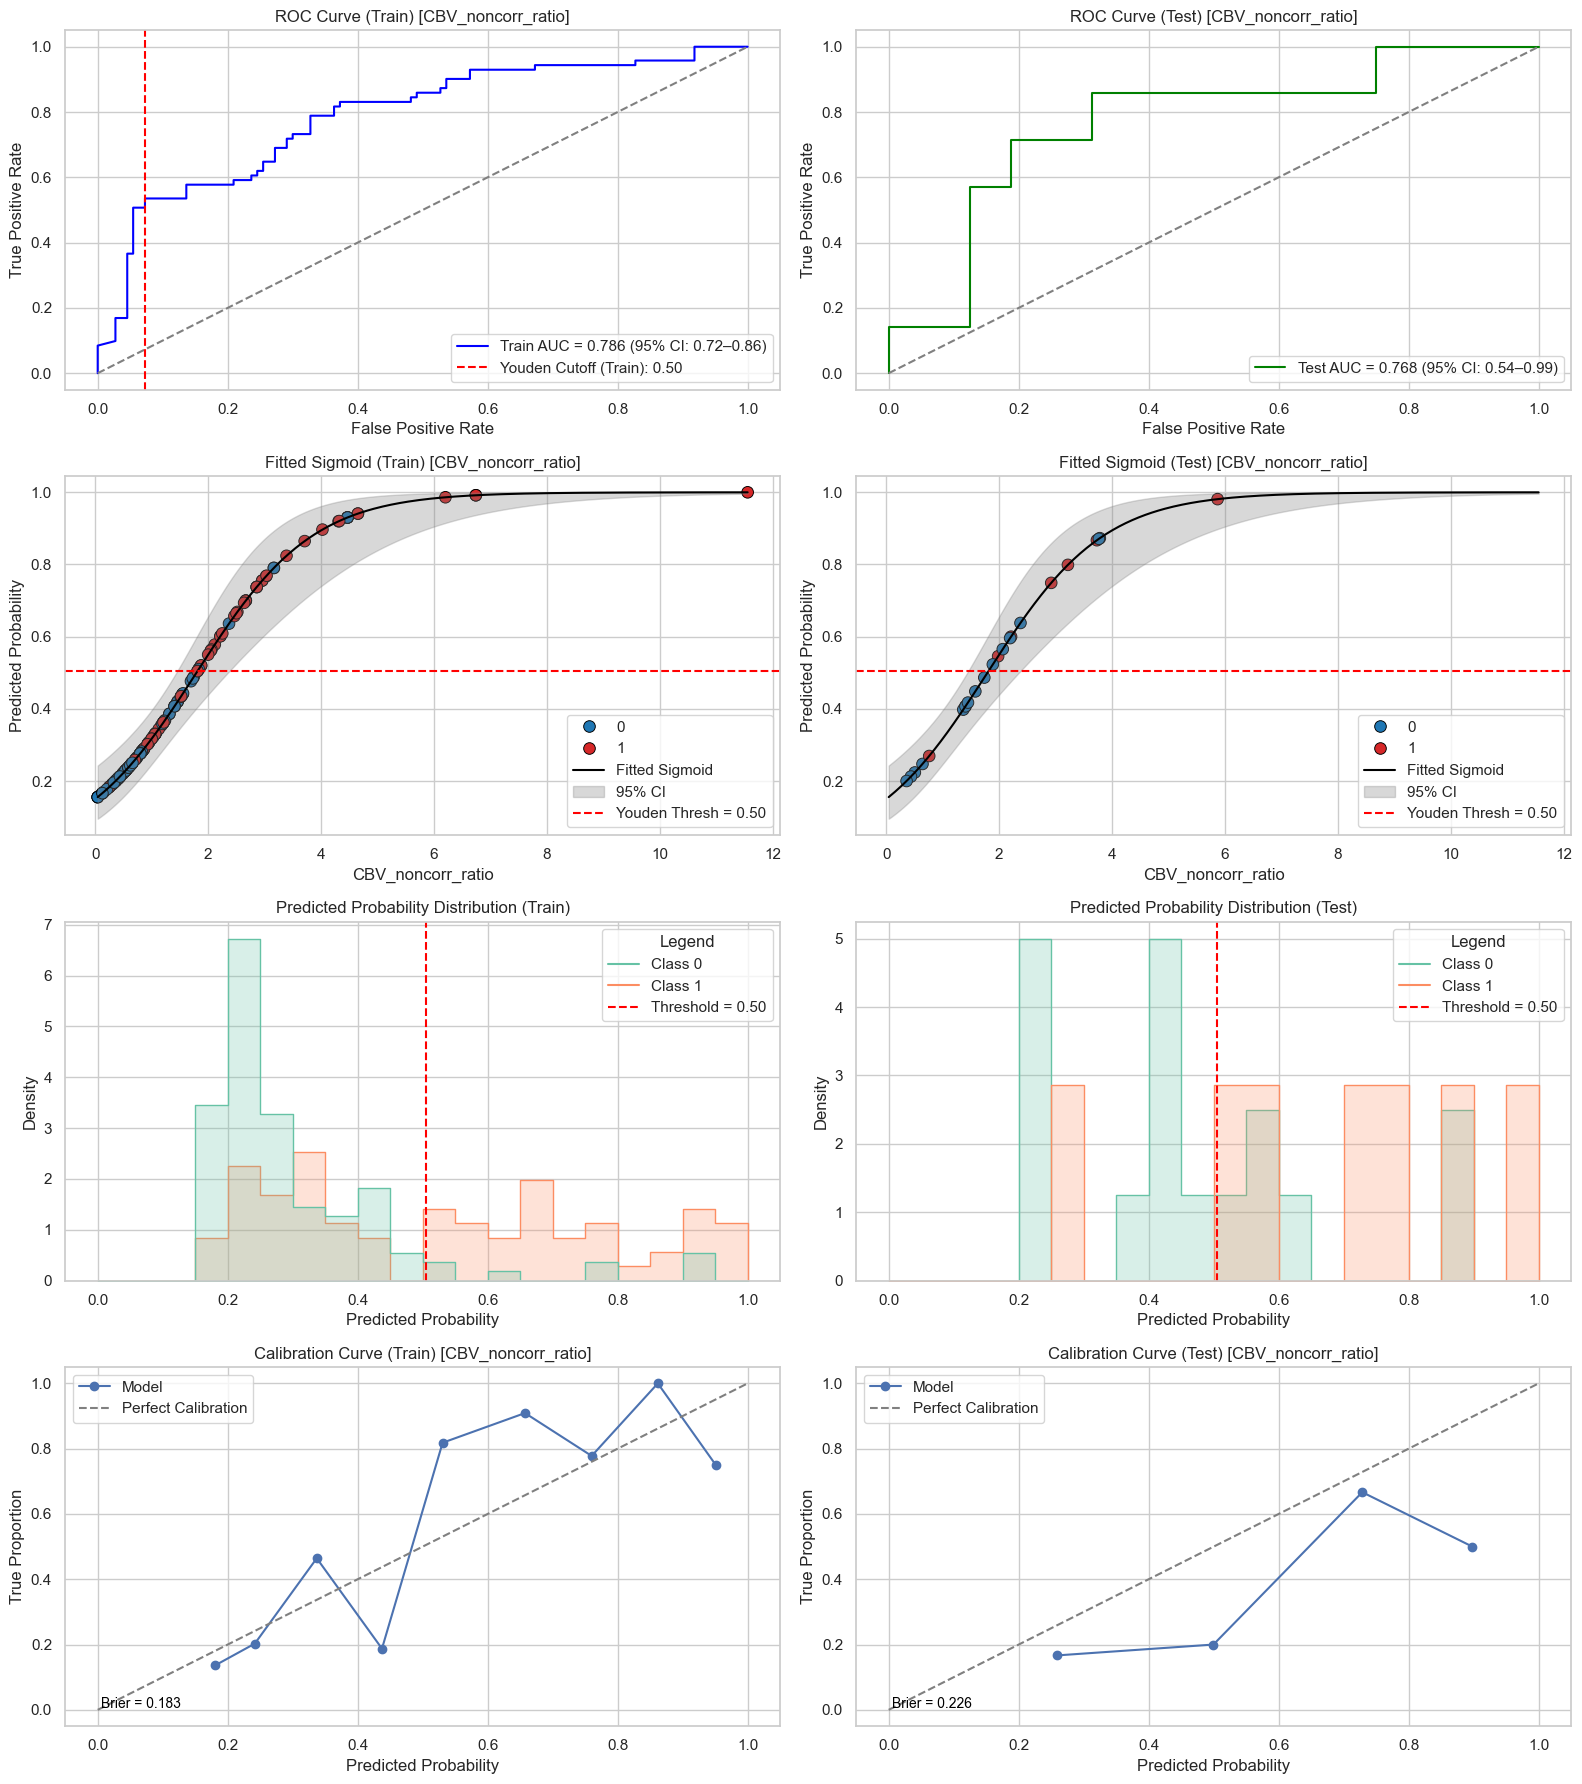

In [20]:
ub.evaluate_logistic_univariate_model(feature=ub.ratio,  target_bin_count=20)

### 5.2 Bivariate Logistic Regression 

BIVARIATE LOGISTIC REGRESSION: CBV_noncorr_path + CBV_noncorr_control
----------------------------------------------------------------------------------------------------
AUC (Train): 0.785 (95% CI: 0.718 – 0.853)
AUC (Test) : 0.821 (95% CI: 0.599 – 1.000)
Optimal Threshold (Youden’s J): 0.484

▶ [CBV_NONCORR_PATH + CBV_NONCORR_CONTROL] TRAIN @ 0.5
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      75.7
Recall (Sensitivity) |      53.5
Specificity          |      90.0
Precision            |      77.6
F1 Score             |      63.3

▶ [CBV_NONCORR_PATH + CBV_NONCORR_CONTROL] TRAIN @ YOUDEN
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      75.7
Recall (Sensitivity) |      57.7
Specificity          |      87.3
Precision            |      74.5
F1 Score             

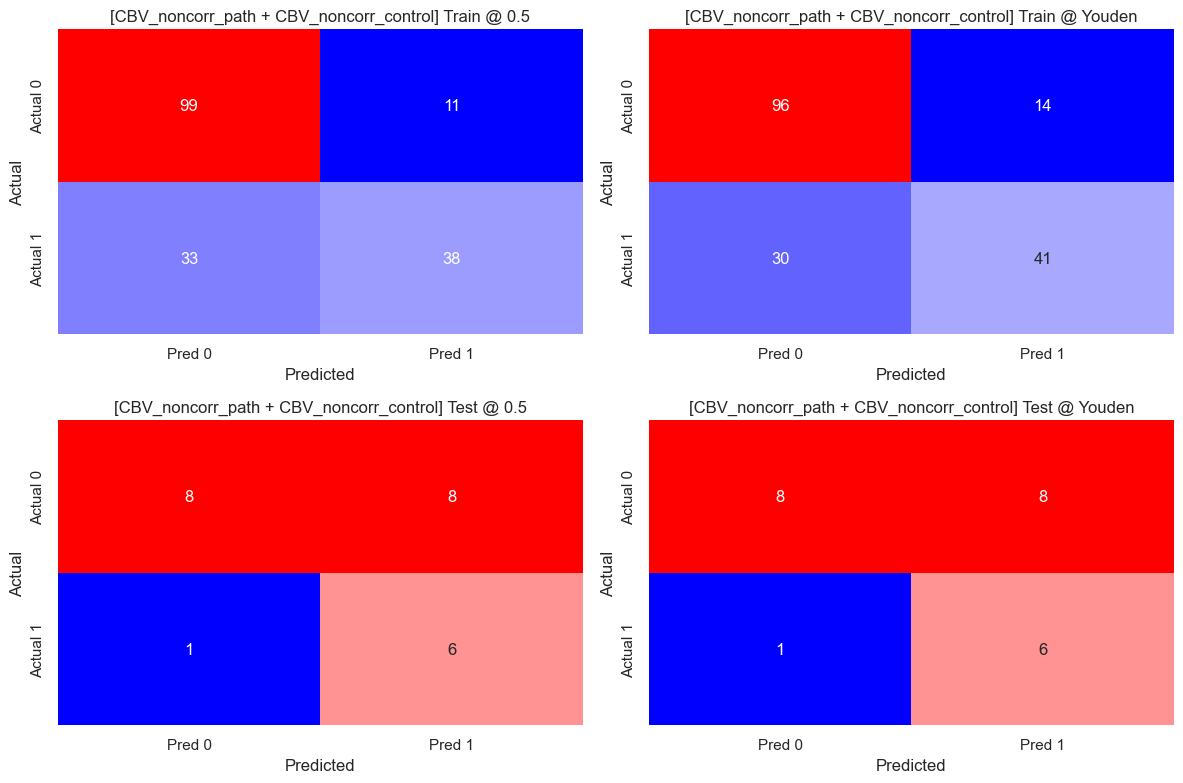

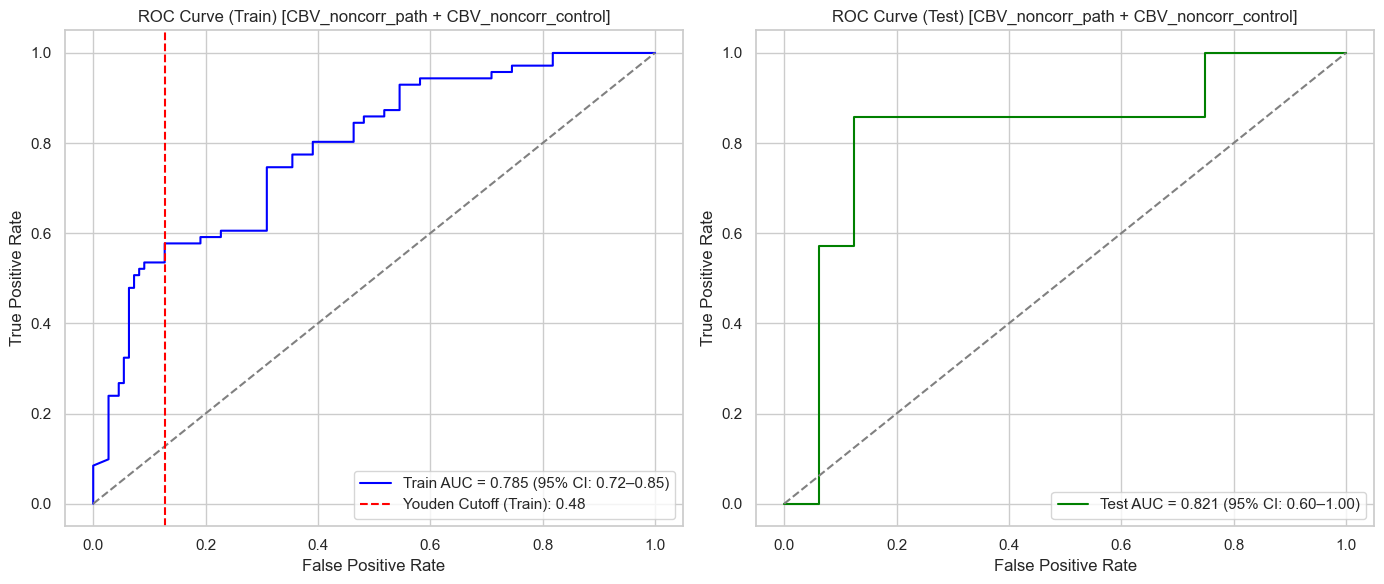

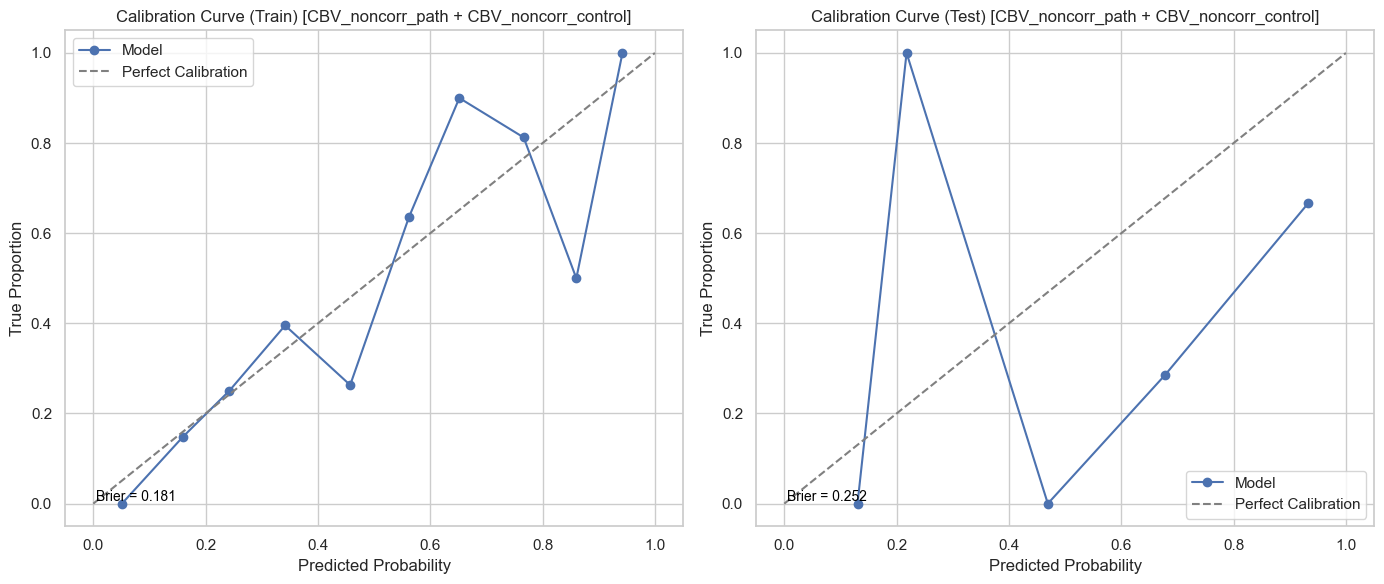

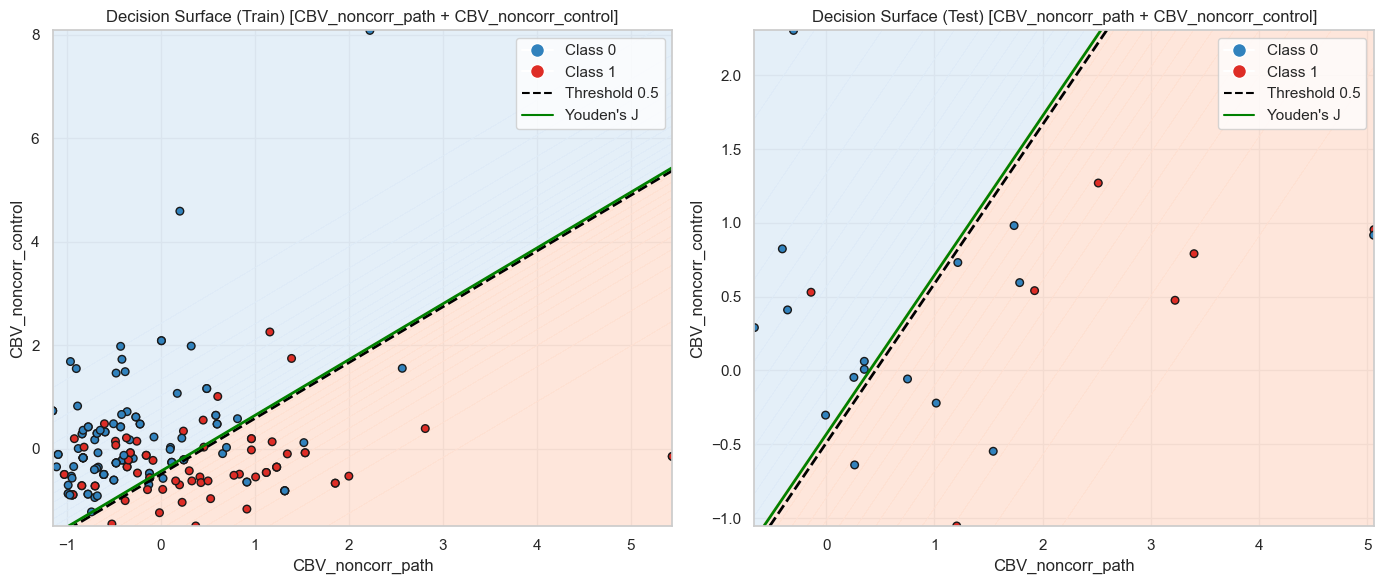

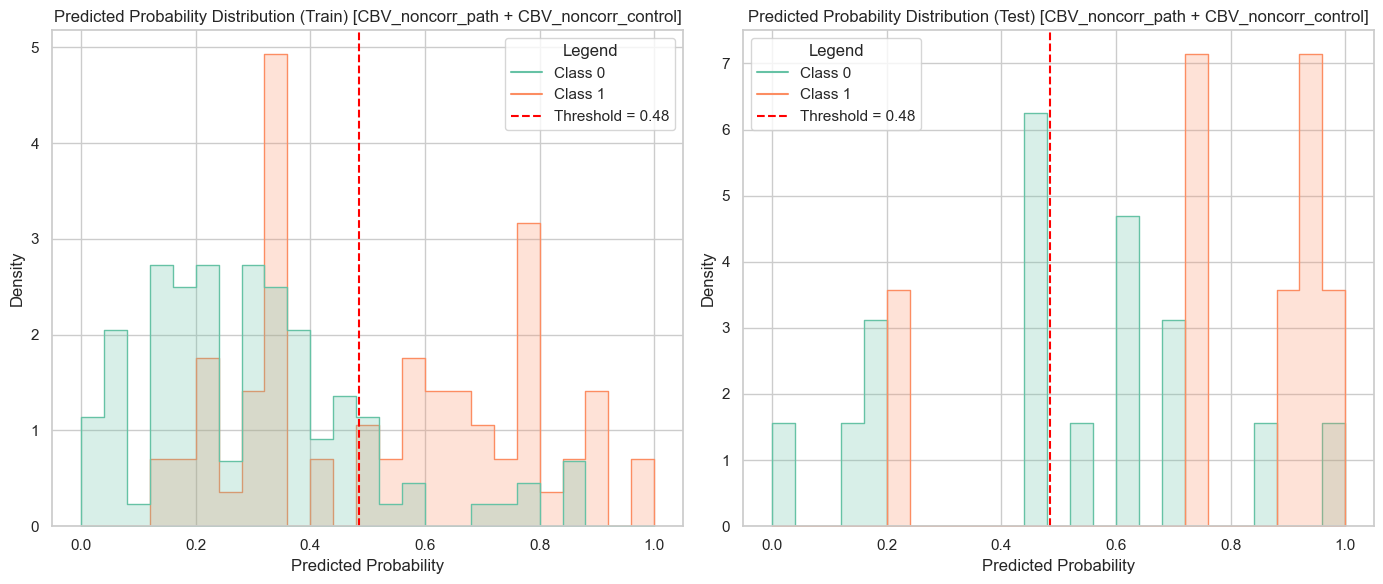

In [21]:
ub.evaluate_logistic_bivariate_model(target_bin_count=25)

## 5.  SVM Modelling

SVM (LINEAR) BIVARIATE: CBV_noncorr_path + CBV_noncorr_control
----------------------------------------------------------------------------------------------------
[Margin] Train AUC : 0.790 (95% CI: 0.723 – 0.856)
[Margin] Test  AUC : 0.812 (95% CI: 0.589 – 1.000)
Optimal Margin Cutoff (Youden): -0.822
----------------------------------------------------------------------------------------------------
[Proba]  Train AUC : 0.790 (95% CI: 0.723 – 0.856)
[Proba]  Test  AUC : 0.812 (95% CI: 0.589 – 1.000)
Optimal Proba  Cutoff (Youden): 0.309

▶ [CBV_NONCORR_PATH + CBV_NONCORR_CONTROL] TRAIN @ F(X) ≥ 0
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      75.1
Recall (Sensitivity) |      49.3
Specificity          |      91.8
Precision            |      79.5
F1 Score             |      60.9

▶ [CBV_NONCORR_PATH + CBV_NONCORR_CONTROL] TRAIN @ F(X) ≥ YOUDEN
--------------------------

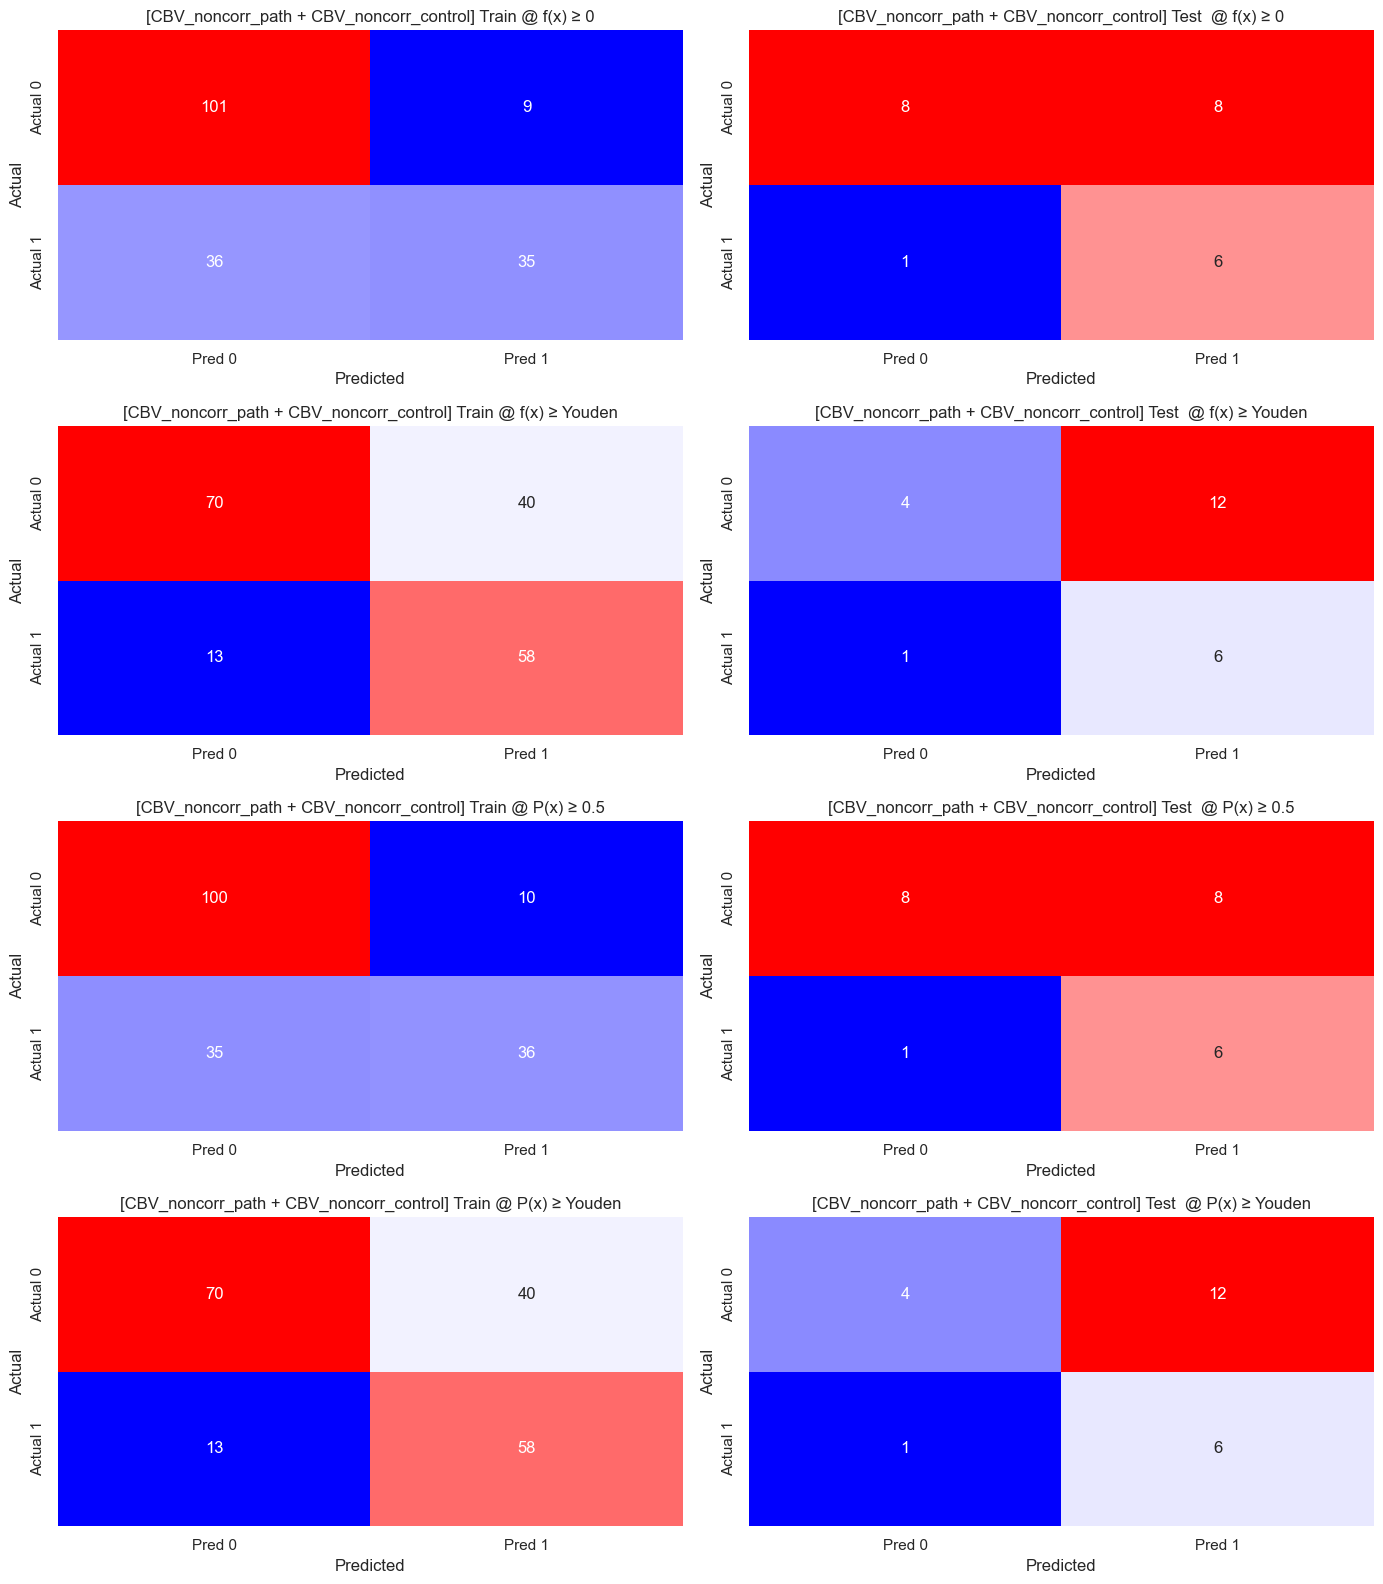

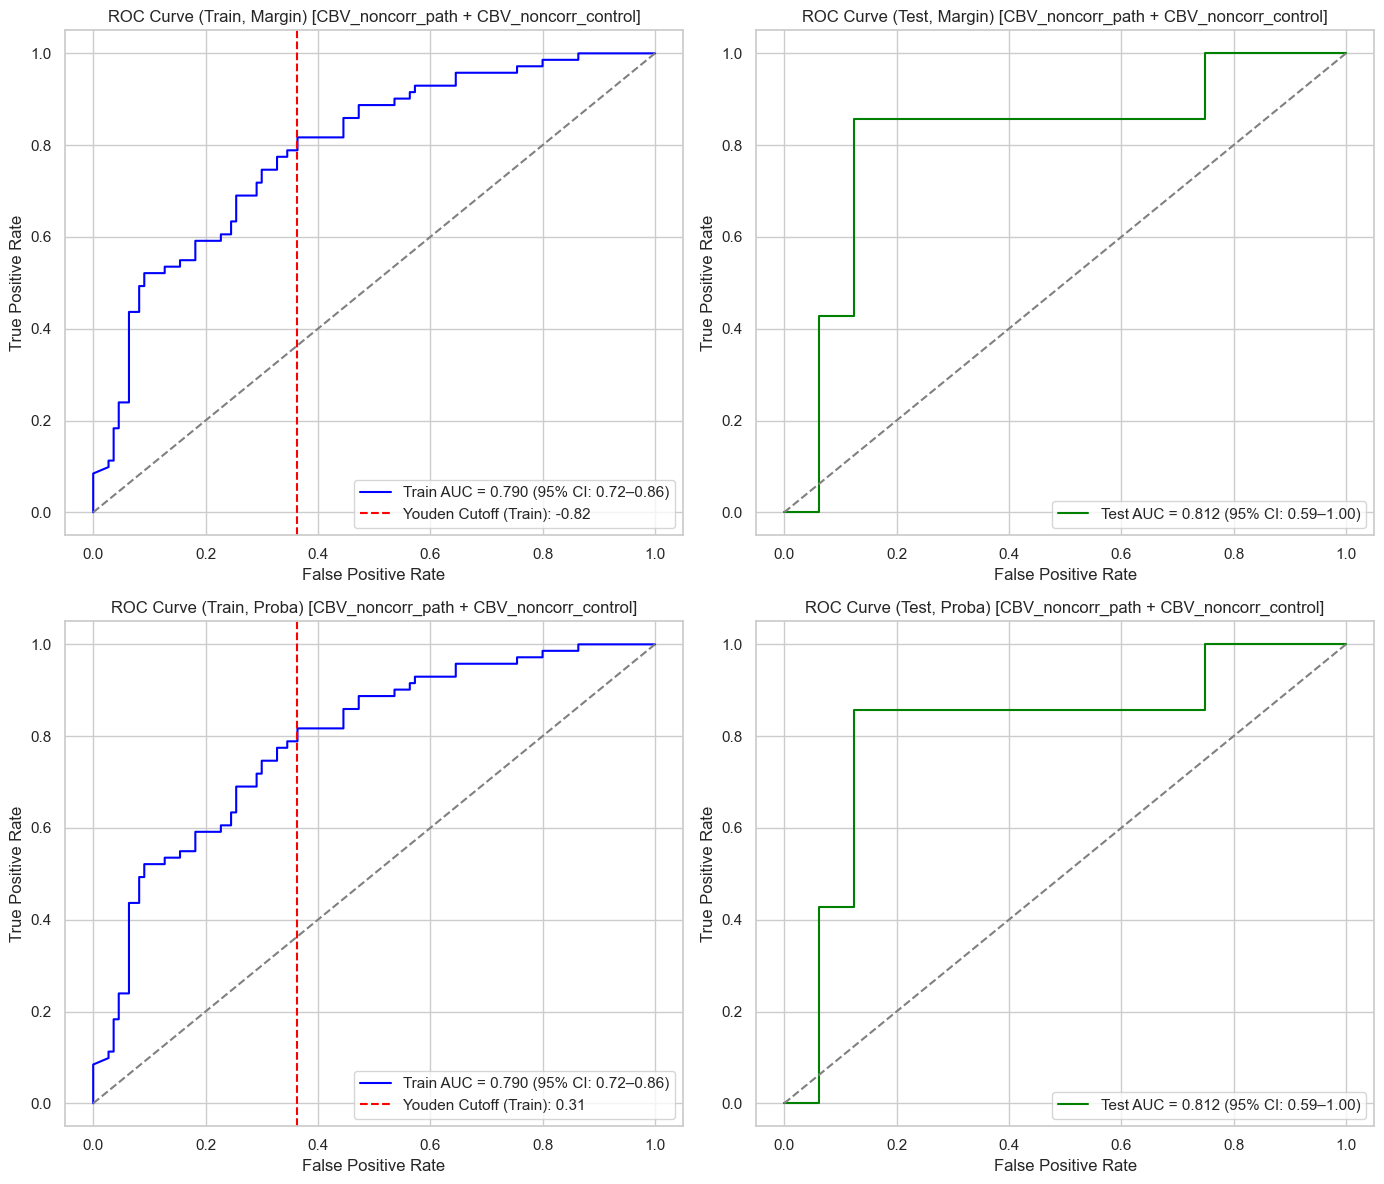

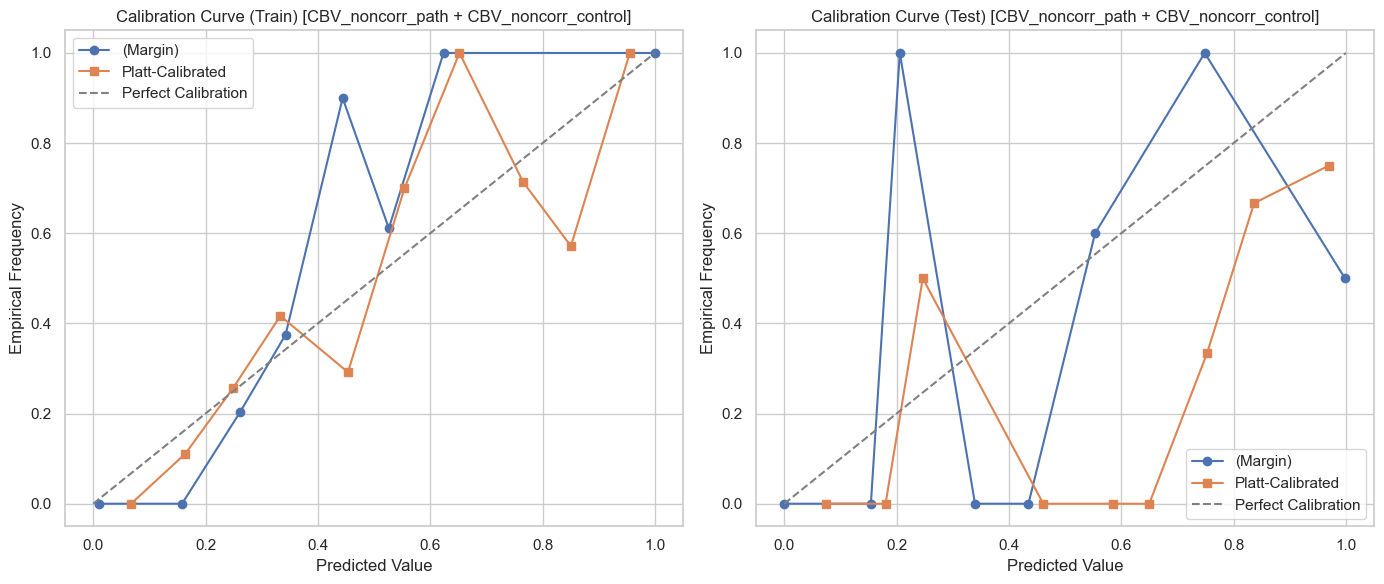

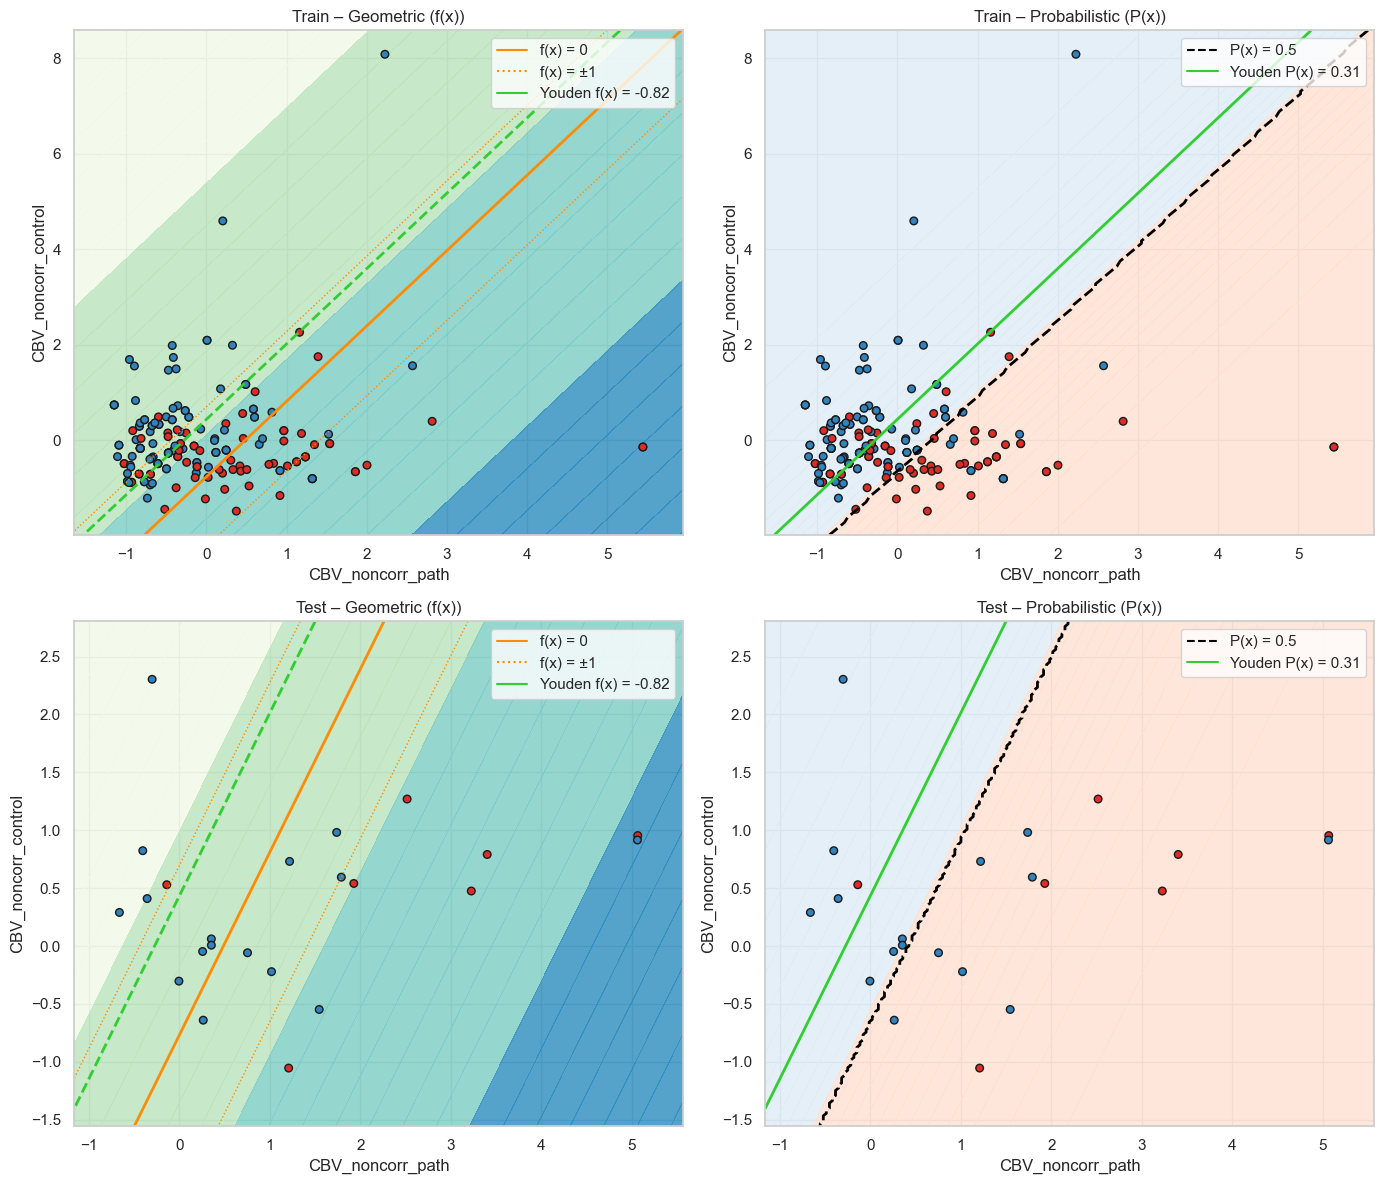

In [22]:
ub.evaluate_svm_bivariate_model(kernel="linear")

SVM (RBF) BIVARIATE: CBV_noncorr_path + CBV_noncorr_control
----------------------------------------------------------------------------------------------------
[Margin] Train AUC : 0.787 (95% CI: 0.719 – 0.856)
[Margin] Test  AUC : 0.652 (95% CI: 0.386 – 0.918)
Optimal Margin Cutoff (Youden): 0.144
----------------------------------------------------------------------------------------------------
[Proba]  Train AUC : 0.787 (95% CI: 0.719 – 0.856)
[Proba]  Test  AUC : 0.652 (95% CI: 0.386 – 0.918)
Optimal Proba  Cutoff (Youden): 0.552

▶ [CBV_NONCORR_PATH + CBV_NONCORR_CONTROL] TRAIN @ F(X) ≥ 0
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      76.2
Recall (Sensitivity) |      54.9
Specificity          |      90.0
Precision            |      78.0
F1 Score             |      64.5

▶ [CBV_NONCORR_PATH + CBV_NONCORR_CONTROL] TRAIN @ F(X) ≥ YOUDEN
------------------------------

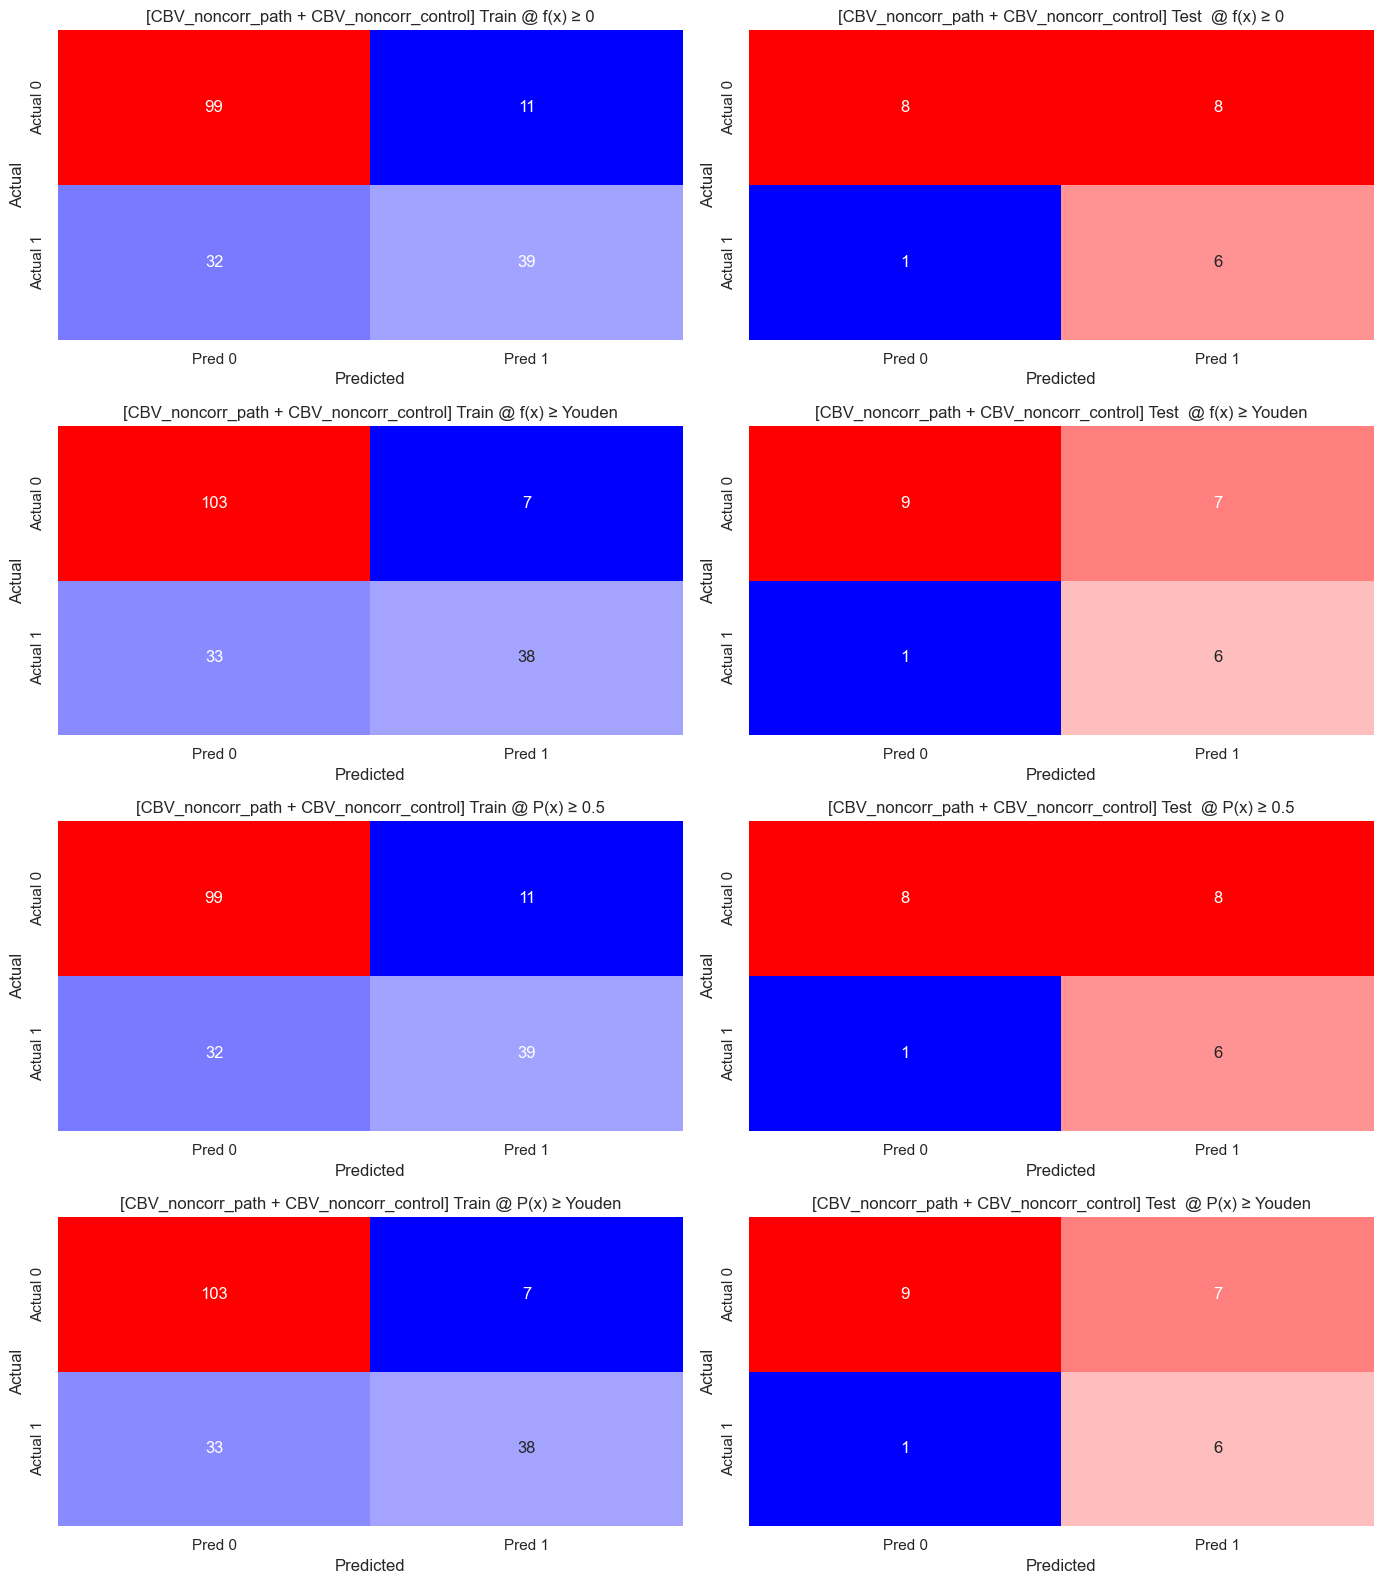

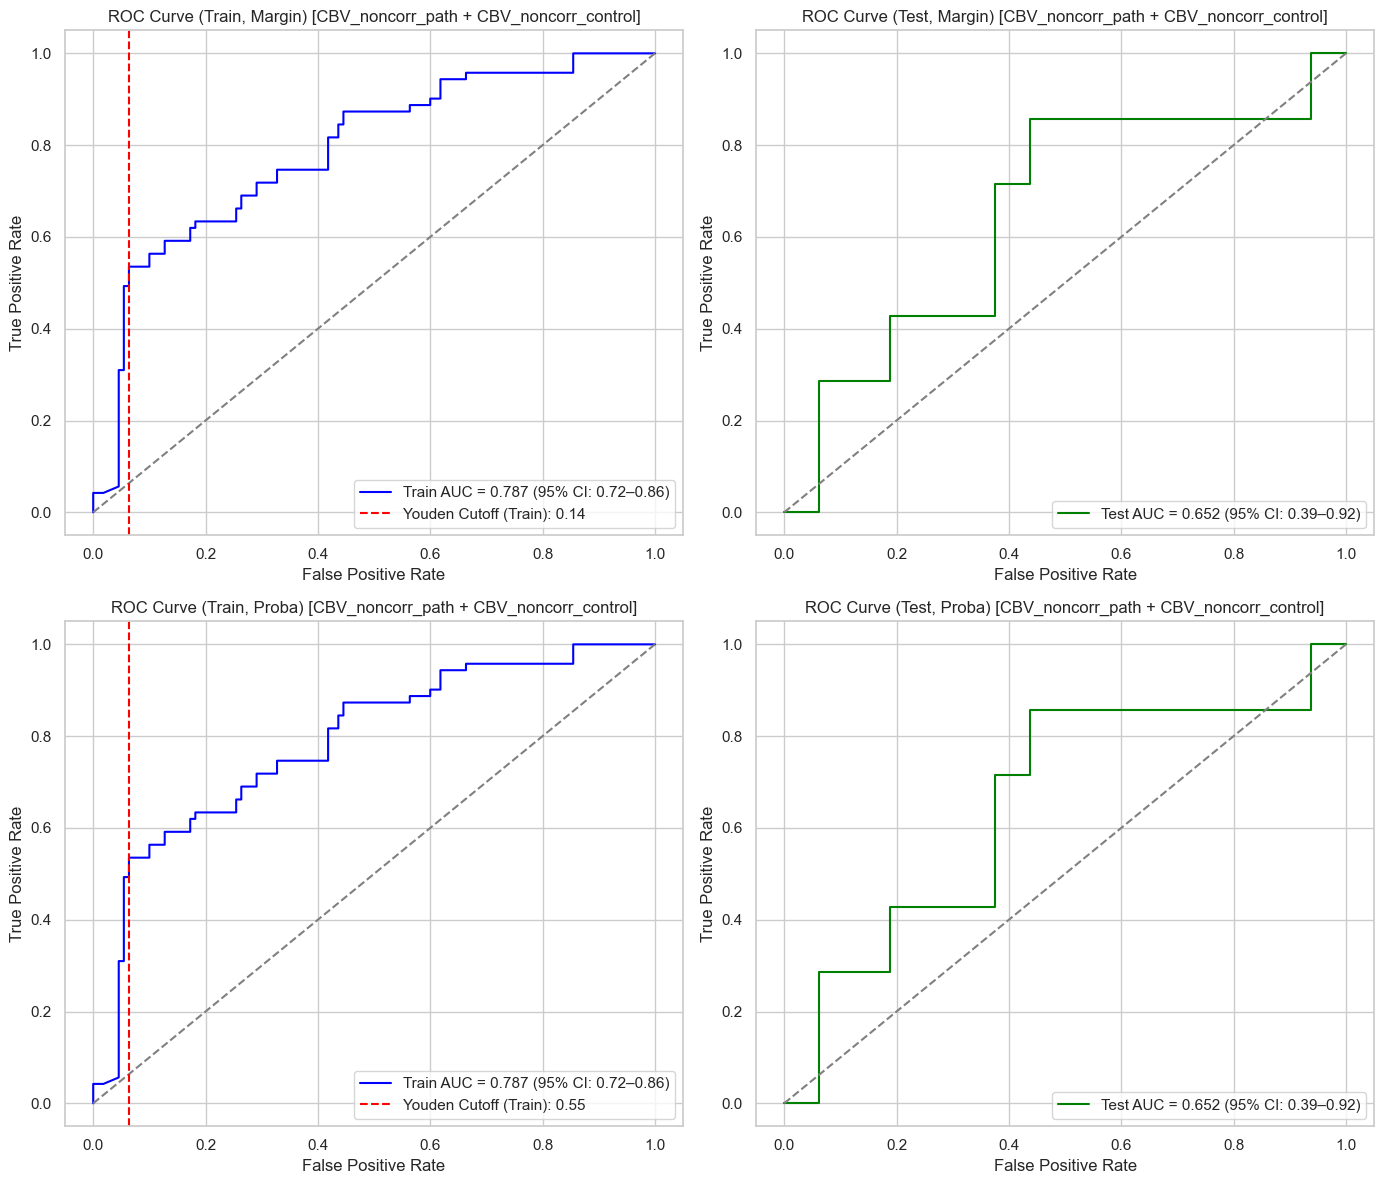

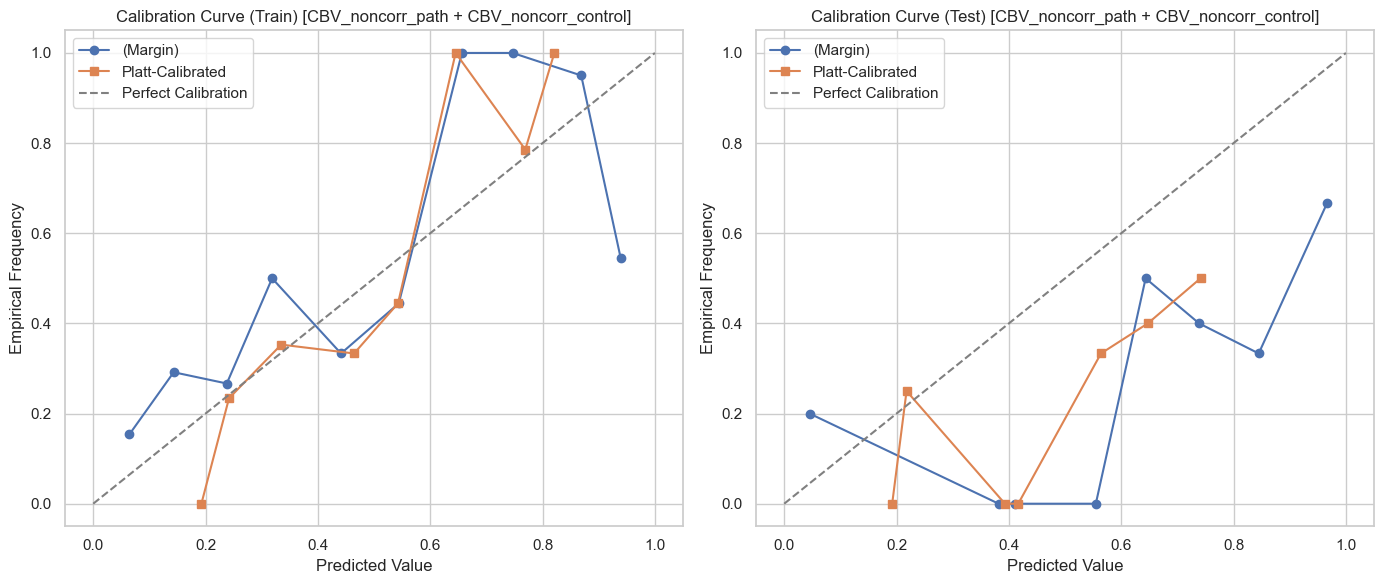

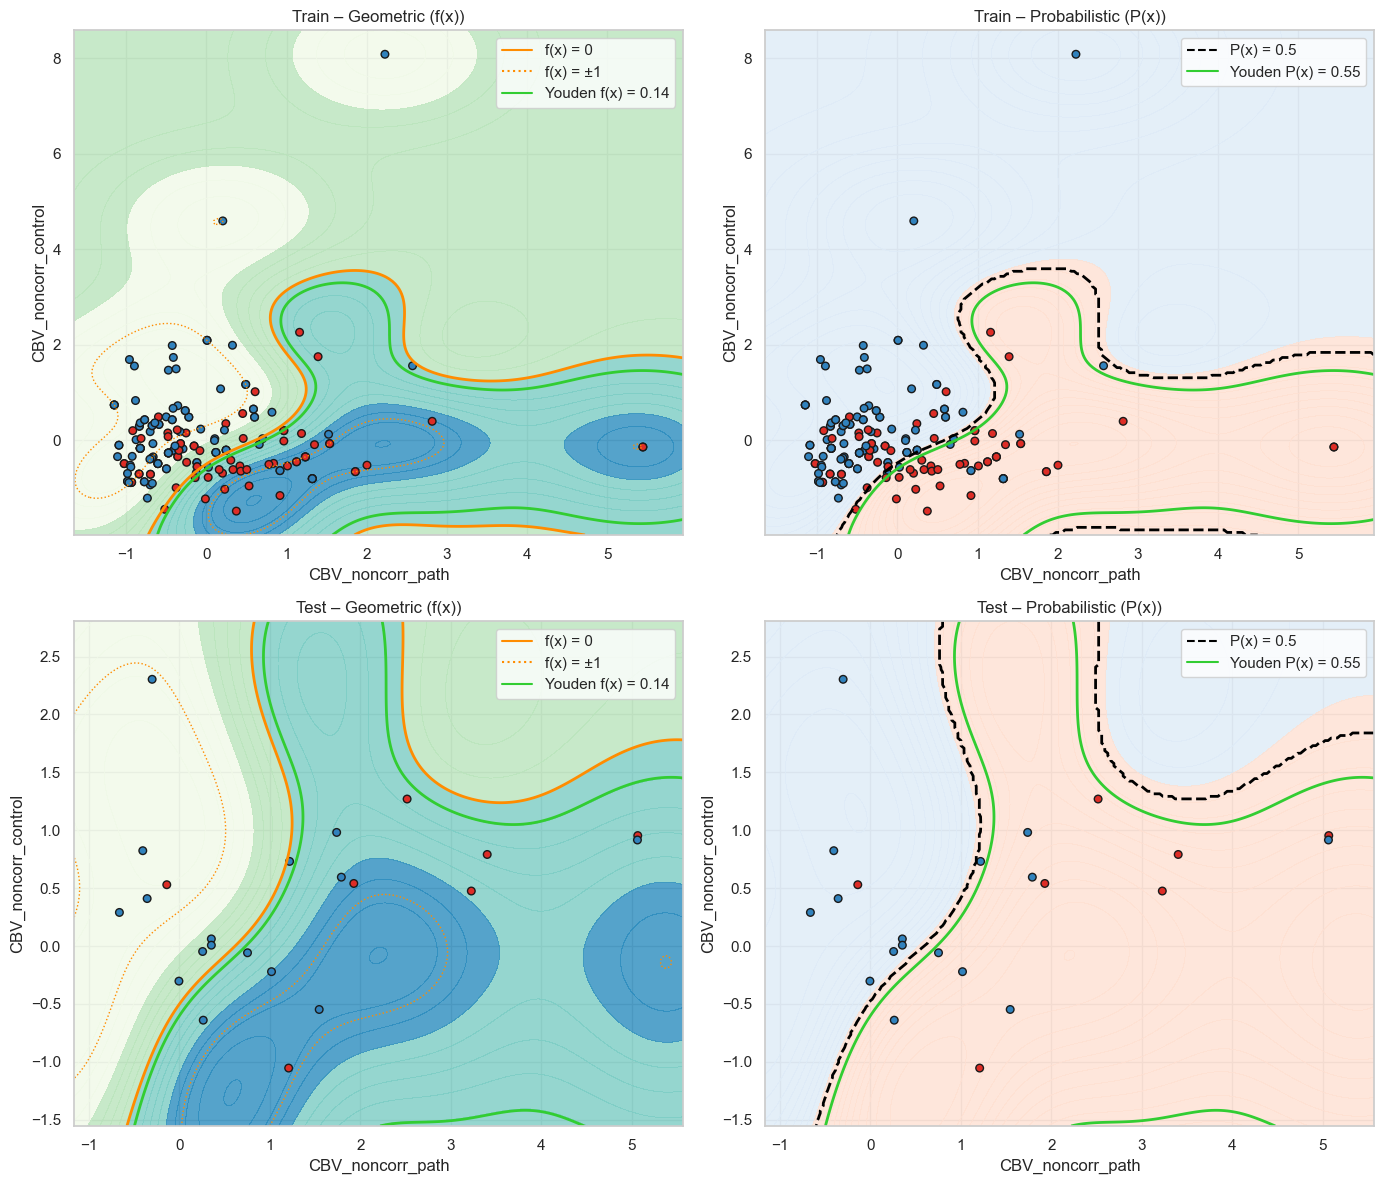

In [23]:
ub.evaluate_svm_bivariate_model(kernel="rbf")

## 6.  Decision Tree Modelling

DECISION TREE (max_depth=3, criterion=GINI): CBV_noncorr_path + CBV_noncorr_control + CBV_noncorr_ratio
----------------------------------------------------------------------------------------------------
AUC (Train): 0.861 (95% CI: 0.808 – 0.914)
AUC (Test) : 0.513 (95% CI: 0.232 – 0.795)
----------------------------------------------------------------------------------------------------

▶ [CBV_NONCORR_PATH + CBV_NONCORR_CONTROL + CBV_NONCORR_RATIO] TRAIN
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      79.6
Recall (Sensitivity) |      74.6
Specificity          |      82.7
Precision            |      73.6
F1 Score             |      74.1

▶ [CBV_NONCORR_PATH + CBV_NONCORR_CONTROL + CBV_NONCORR_RATIO] TEST
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      65.2

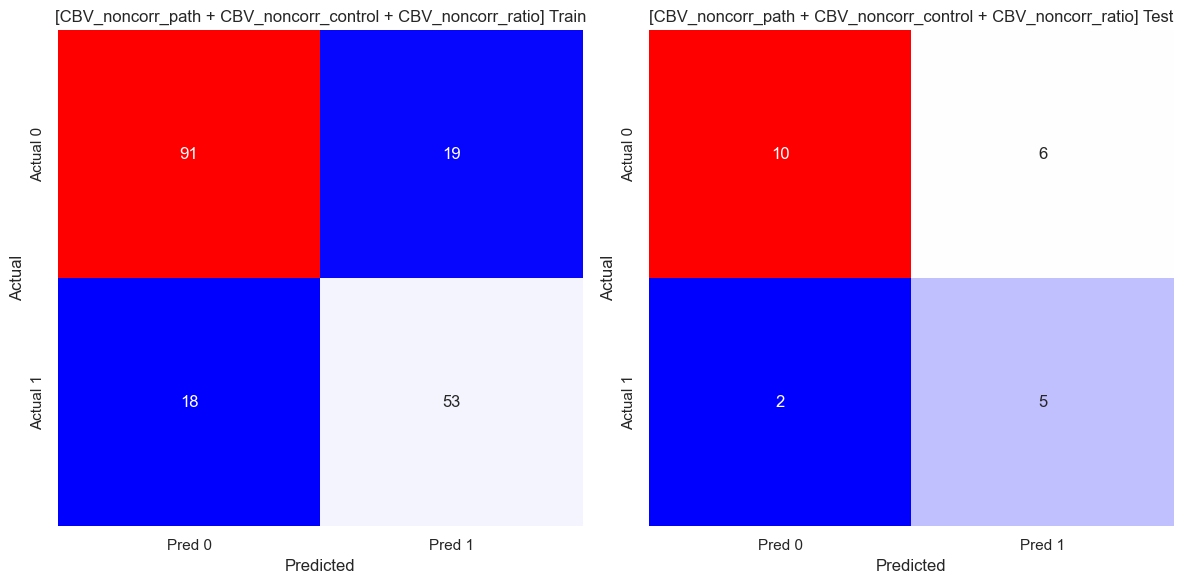

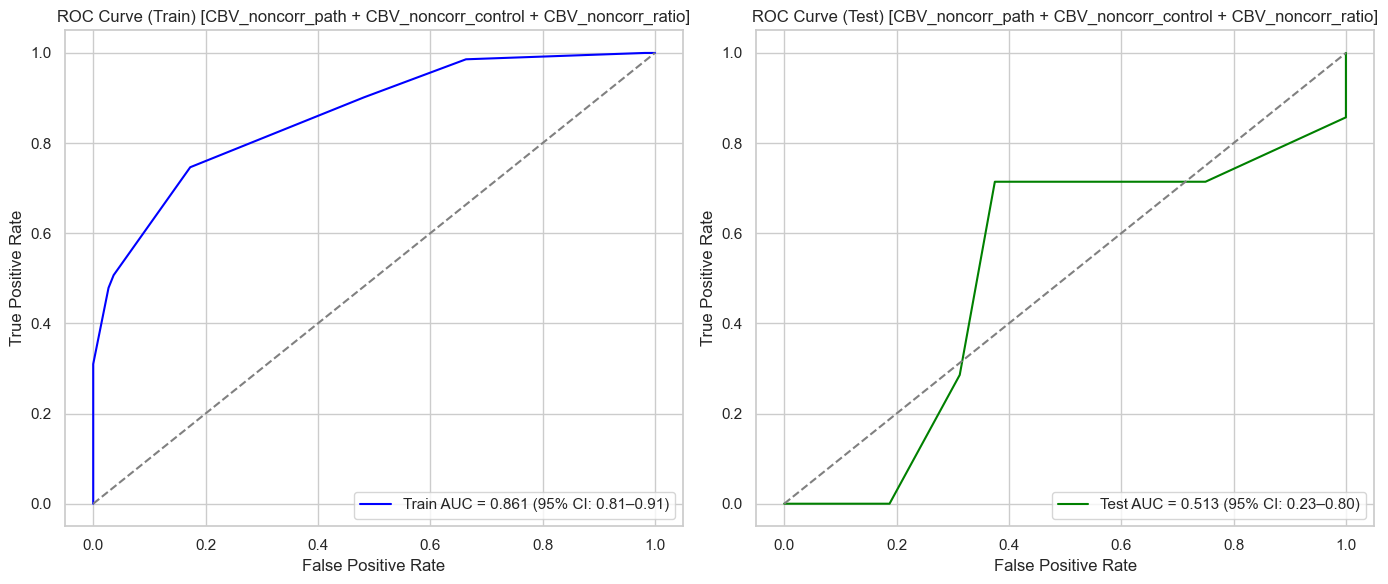

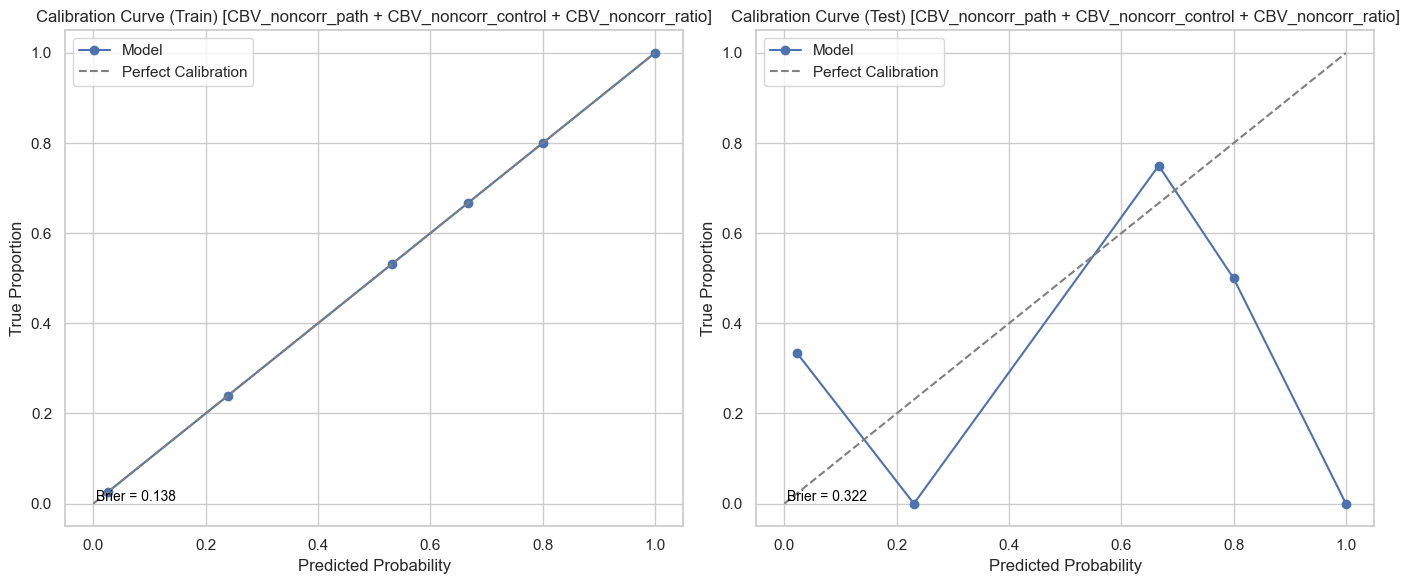

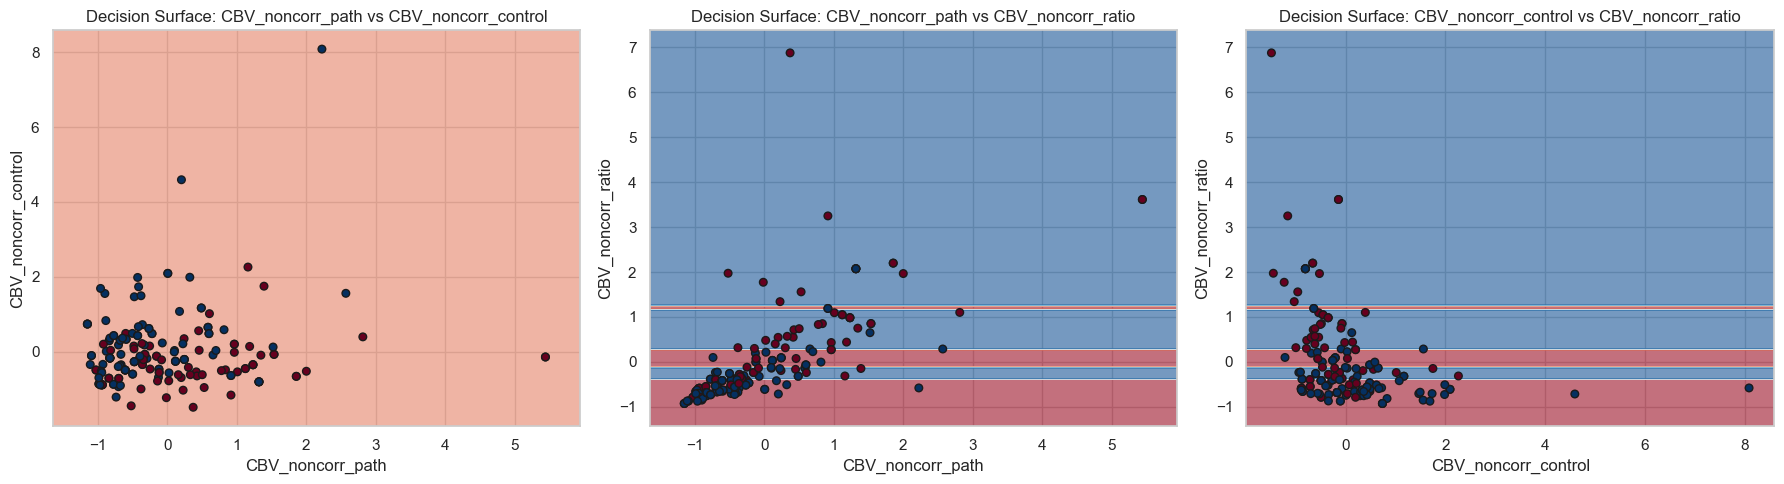

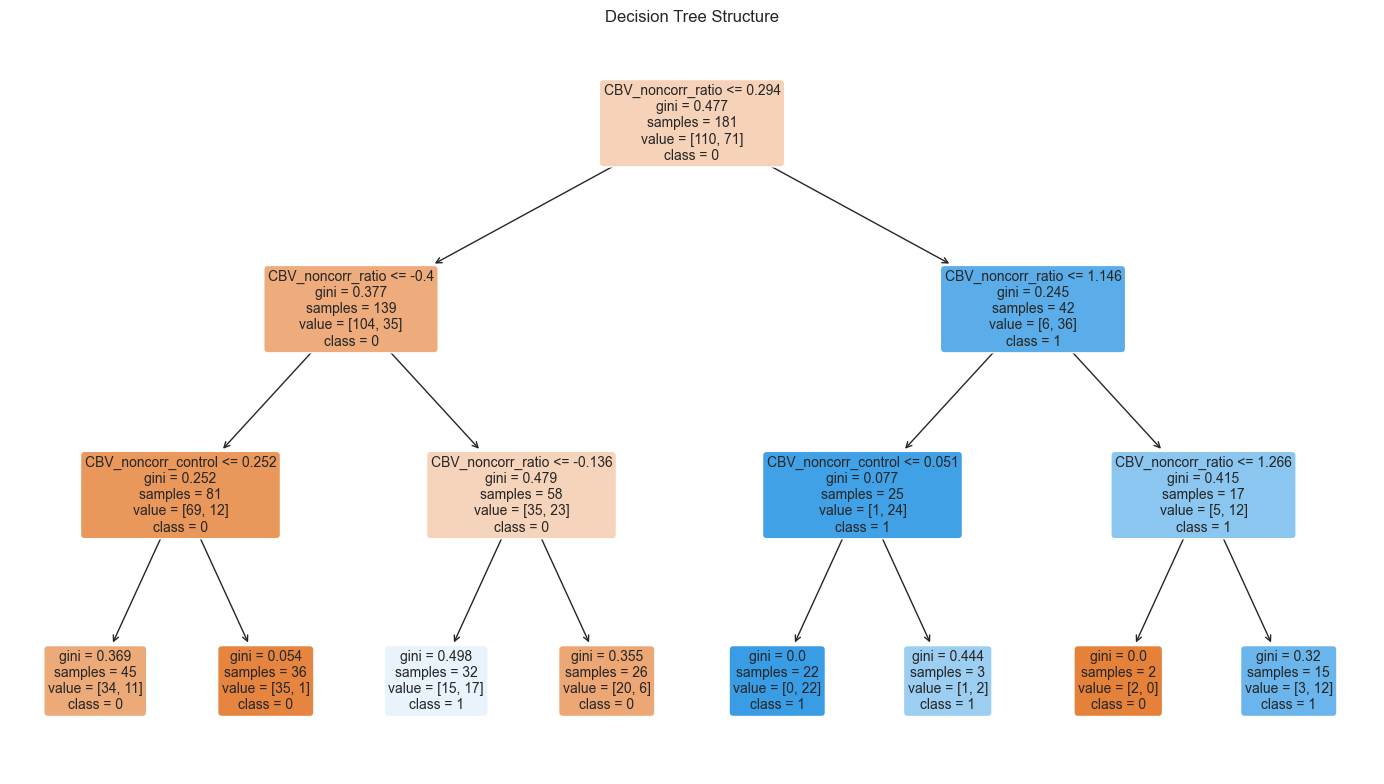


Tree Rules :
--------------------------------------------------------------------------------
|--- CBV_noncorr_ratio <= 0.29
|   |--- CBV_noncorr_ratio <= -0.40
|   |   |--- CBV_noncorr_control <= 0.25
|   |   |   |--- class: 0
|   |   |--- CBV_noncorr_control >  0.25
|   |   |   |--- class: 0
|   |--- CBV_noncorr_ratio >  -0.40
|   |   |--- CBV_noncorr_ratio <= -0.14
|   |   |   |--- class: 1
|   |   |--- CBV_noncorr_ratio >  -0.14
|   |   |   |--- class: 0
|--- CBV_noncorr_ratio >  0.29
|   |--- CBV_noncorr_ratio <= 1.15
|   |   |--- CBV_noncorr_control <= 0.05
|   |   |   |--- class: 1
|   |   |--- CBV_noncorr_control >  0.05
|   |   |   |--- class: 1
|   |--- CBV_noncorr_ratio >  1.15
|   |   |--- CBV_noncorr_ratio <= 1.27
|   |   |   |--- class: 0
|   |   |--- CBV_noncorr_ratio >  1.27
|   |   |   |--- class: 1



In [24]:
ub.evaluate_tree_trivariate_model()